# Exploratory Data Analysis

In [1]:
!pip install wikipedia

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from currency_converter import CurrencyConverter
from currency_converter import RateNotFoundError
from datetime import date
import wikipedia

warnings.filterwarnings('ignore')
imdb = pd.read_csv('./IMDB_Movies_2000_2020.csv')

## Dataset Overview

In [3]:
imdb.head(30)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,"Comedy, Fantasy, Romance",118,USA,English,French,...,Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,"Drama, Music, Romance",104,USA,English,NaN,...,Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0
2,tt0118694,In the Mood for Love,Fa yeung nin wah,2000,27/10/2000,"Drama, Romance",98,"Hong Kong, China",Cantonese,Shanghainese,...,Maggie Cheung,"Maggie Cheung, Tony Chiu-Wai Leung","Two neighbors, a woman and a man, form a stron...","Two neighbors, a woman and a man,",8.1,119171,NaN,2738980.0,12854953,422.0
3,tt0120202,"Hollywood, Vermont",State and Main,2000,31/05/2002,"Comedy, Drama",105,"France, USA",English,Italian,...,Michael Higgins,"Michael Higgins, Michael Bradshaw",A movie crew invades a small town whose reside...,A movie crew invades a small town,6.7,20220,NaN,6944471.0,9206279,175.0
4,tt0120263,Canzoni del secondo piano,Sånger från andra våningen,2000,06/10/2000,"Comedy, Drama",98,"Sweden, Norway, Denmark",Swedish,Russian,...,Lars Nordh,"Lars Nordh, Stefan Larsson",Where are we humans going? A film poem inspire...,Where are we humans going? A film,7.6,17188,NaN,80334.0,80334,110.0
5,tt0120630,Galline in fuga,Chicken Run,2000,15/12/2000,"Animation, Adventure, Comedy",84,"UK, USA, France",English,NaN,...,Phil Daniels,"Phil Daniels, Lynn Ferguson",When a cockerel apparently flies into a chicke...,When a cockerel apparently flies,7.0,173987,45000000,106834564.0,224834564,393.0
6,tt0120667,I Fantastici 4,Fantastic Four,2005,16/09/2005,"Action, Adventure, Fantasy",106,"USA, Germany",English,NaN,...,Ioan Gruffudd,"Ioan Gruffudd, Jessica Alba",A group of astronauts gain superpowers after a...,A group of astronauts gain superpowers,5.7,307944,100000000,154696080.0,333535934,1029.0
7,tt0120679,Frida,Frida,2002,17/01/2003,"Biography, Drama, Romance",123,"Mexico, USA, Canada",English,French,...,Salma Hayek,"Salma Hayek, Mía Maestro","A biography of artist Frida Kahlo, who channel...","A biography of artist Frida Kahlo,",7.4,79690,12000000,25885000.0,56298474,297.0
8,tt0120681,La vera storia di Jack lo Squartatore,From Hell,2001,21/12/2001,"Horror, Mystery, Thriller",122,"USA, Czech Republic, UK",English,NaN,...,Johnny Depp,"Johnny Depp, Heather Graham","In Victorian-era London, a troubled clairvoyan...","In Victorian-era London, a troubled",6.8,144714,35000000,31602566.0,74558115,556.0
9,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,The Lord of the Rings: The Fellowship of the Ring,2001,18/01/2002,"Action, Adventure, Drama",178,"New Zealand, USA",English,Sindarin,...,Alan Howard,"Alan Howard, Noel Appleby",A meek Hobbit from the Shire and eight compani...,A meek Hobbit from the Shire and,8.8,1619920,93000000,315544750.0,887934303,5392.0


In [4]:
# Column names
imdb.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'reviews_from_users'],
      dtype='object')

In [5]:
# Dataset size
imdb.shape

(5487, 24)

In [6]:
#imdb.avg_vote.isna().sum() 
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          5487 non-null   object 
 1   title                  5487 non-null   object 
 2   original_title         5487 non-null   object 
 3   year                   5487 non-null   int64  
 4   date_published         5487 non-null   object 
 5   genre                  5487 non-null   object 
 6   duration               5487 non-null   int64  
 7   country                5487 non-null   object 
 8   language_1             5485 non-null   object 
 9   language_2             2170 non-null   object 
 10  language_3             931 non-null    object 
 11  director               5487 non-null   object 
 12  writer                 5483 non-null   object 
 13  actors                 5486 non-null   object 
 14  actors_1               5487 non-null   object 
 15  acto

The dataset we use is the IMDB movies from 2000 to 2020. This dataset has 24 variables, including film ID, film title, published year and date, genre, duration, country, language, director, writer, actors, description, audience vote and review, budget and income. 5487 films are included. Most entries are non-null, except language_2 and language_3, because most films only have one language. Besides, variable language_1, writer, actors, budget, usa_gross_income, worlwide_gross_income, reviews_from_users have few missing values.

## Number of Films for Each Country

In [7]:
array_country = []
for string in imdb.country:
    countrys = string.split(',')
    for country in countrys:
        array_country.append(country.strip())
        
country, frequency = np.unique(array_country, return_counts=True)

country = np.reshape(country, (country.shape[0],1))
frequency = np.reshape(frequency, (frequency.shape[0],1))
country = np.concatenate((country, frequency),axis=1)

bond = 30

data=pd.DataFrame({"num_of_movies": country[:,1].astype(np.int)},index= country[:,0])
minority = data[data.num_of_movies<bond]
sum1 = minority.sum()
data_new  = data[data.num_of_movies>=bond]
data_new = pd.concat([data_new, pd.DataFrame({"num_of_movies": sum1.num_of_movies}, index = ['Others'])])
# -------After sorting-----------
data = data.sort_values(by = ['num_of_movies'],ascending = False)
data[:10]

,num_of_movies
USA,4024
UK,1064
France,648
Germany,564
Canada,554
India,362
Japan,217
Spain,178
Australia,171
China,170


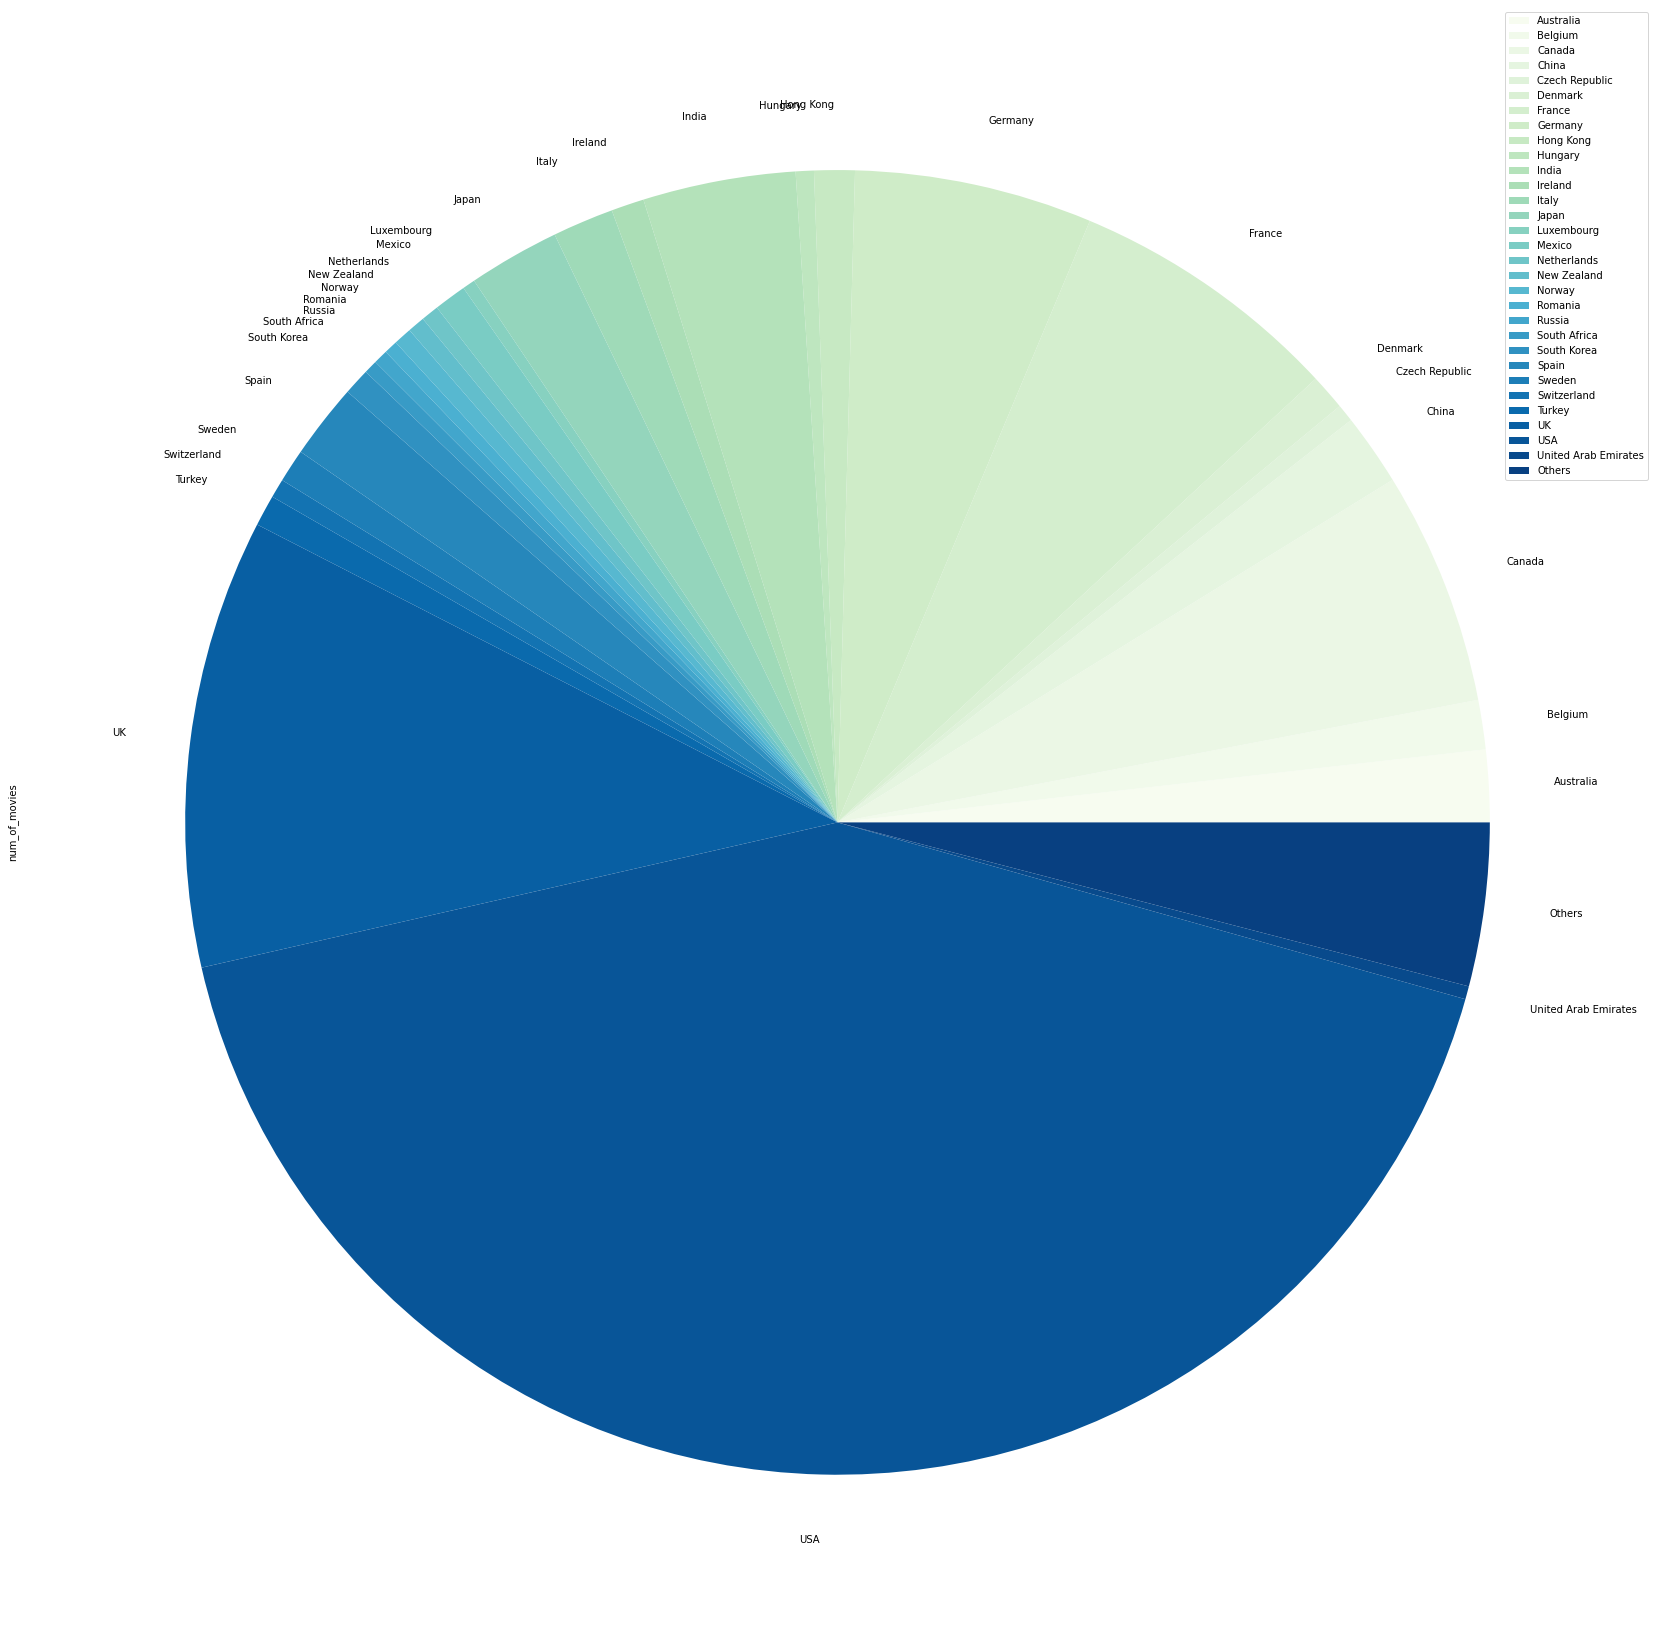

In [8]:
ax1 = data_new.plot.pie(y = 'num_of_movies', figsize = (30,30), cmap='GnBu')

We count the number of films each country shoots and plot a pie chart to show each country's film number, countries with less than 30 films are shown in "others". The pie chart shows that the USA shot the most films, 4024. The UK's number is three times less than the USA's but still has 1064 films. Other countries such as France, Germany, Canada, India, Japan, Spain, Australia, and China have more than 100 films.

## Number of Films for Each Actor

In [9]:
def split_names(col):
    array = []
    imdb_sub = imdb.dropna(subset = [col])
    for ind in imdb_sub.index:
        names = imdb_sub.at[ind, col].split(',')
        for name in names:
            array.append(name.strip())
            
    return np.unique(array, return_counts=True)

In [10]:
def combine_name_freq(names, freq, bond = 30):
    # print("--------in function----------")
    names = np.reshape(names, (names.shape[0],1))
    freq = np.reshape(freq, (freq.shape[0],1))
    names = np.concatenate((names, freq),axis=1)

    data= pd.DataFrame({"names": names[:,0], "num": names[:,1].astype(np.int)})
    data = data.sort_values(by = ['num'], ascending = False)
    
    if(bond>0):
        # print(data)
        minority = data[data.num<bond]
        # print("minority")
        # print(minority)
        sum1 = minority.sum()
        data_new  = data[data.num>=bond]
        data_new = pd.concat([data_new, pd.DataFrame({"num": sum1.num}, index = ['Others'])])
        # -------After sorting-----------
        data = data_new.sort_values(by = ['num'],ascending = False)
    return data

In [11]:
def relation_plot(df, cmap = 'RdPu', xlog = False, ylog = False,figsize = (20, 10)):
    
    columns = df.columns
    df = df.astype(int)
    colors = np.random.rand(len(df))
    # print(df)
    fig = plt.figure(figsize=figsize, dpi=80)
    ax = plt.gca()
    if(xlog): ax.set_xscale('log')
    if(ylog): ax.set_yscale('log')
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.scatter(df[columns[0]], df[columns[1]], c=colors, alpha = 0.2, cmap = cmap)
    plt.show()

                    names  num
34116   Samuel L. Jackson   57
27843      Morgan Freeman   45
5555         Bruce Willis   42
34561  Scarlett Johansson   41
40093        Willem Dafoe   40
28858        Nicolas Cage   40
16068        J.K. Simmons   40
32712      Robert De Niro   38
12248       Ewan McGregor   37
40266     Woody Harrelson   37
29670         Owen Wilson   37
16603        James Franco   37
17163       Jason Statham   36
30198       Paul Giamatti   36
6319       Cate Blanchett   36
25224       Mark Wahlberg   36
2992     Antonio Banderas   36
32319     Richard Jenkins   36
36451       Steve Buscemi   35
6709      Charlize Theron   35


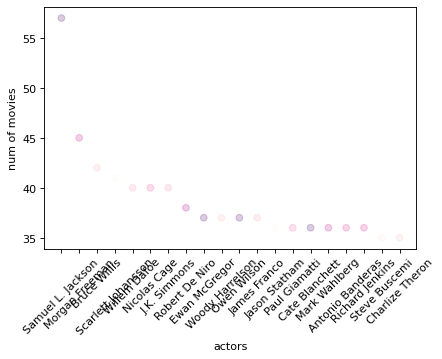

In [12]:
actors, actor_freq = split_names('actors')
actors = combine_name_freq(actors, actor_freq, bond = 0)
print(actors[:20])
#colors = np.random.rand(len(actors))
colors = np.random.rand(20)
fig = plt.figure(dpi=80)
ax = plt.gca()
ax.set_xlabel('actors')
ax.set_ylabel("num of movies")
ax.scatter(actors.names[:20], actors.num[:20], c=colors, alpha = 0.2, cmap = 'RdPu')
plt.xticks(rotation = 45)
plt.show()

We count the number of films each actor cast and give a scatter plot to show the top 20 actors who act in the most movies. From this plot, Samuel L. Jackson performs the most films, 57. Morgan Freeman, Bruce Willis, Scarlett Johansson, Willem Dafoe, Nicolas Cage, and J.K. Simmons are also acted in more than 40 films.

## Number of Films for Each Genre

In [13]:
array_genre = []
for string in imdb.genre:
    genres = string.split(',')
    for genre in genres:
        array_genre.append(genre.strip())
        
genre, frequency = np.unique(array_genre, return_counts=True)

genre = np.reshape(genre, (genre.shape[0],1))
frequency = np.reshape(frequency, (frequency.shape[0],1))
genre = np.concatenate((genre, frequency),axis=1)

bond = 30

data_genre=pd.DataFrame({"num_of_movies": genre[:,1].astype(np.int)},index= genre[:,0])
minority = data_genre[data_genre.num_of_movies<bond]
sum1 = minority.sum()
data_genre_new  = data_genre[data_genre.num_of_movies>=bond]
data_genre_new = pd.concat([data_genre_new, pd.DataFrame({"num_of_movies": sum1.num_of_movies}, index = ['Others'])])
# -------After sorting-----------
data_genre = data_genre.sort_values(by = ['num_of_movies'],ascending = False)
data_genre[:10]

,num_of_movies
Drama,3142
Comedy,2011
Action,1480
Crime,1066
Thriller,964
Romance,961
Adventure,942
Horror,673
Mystery,592
Fantasy,435


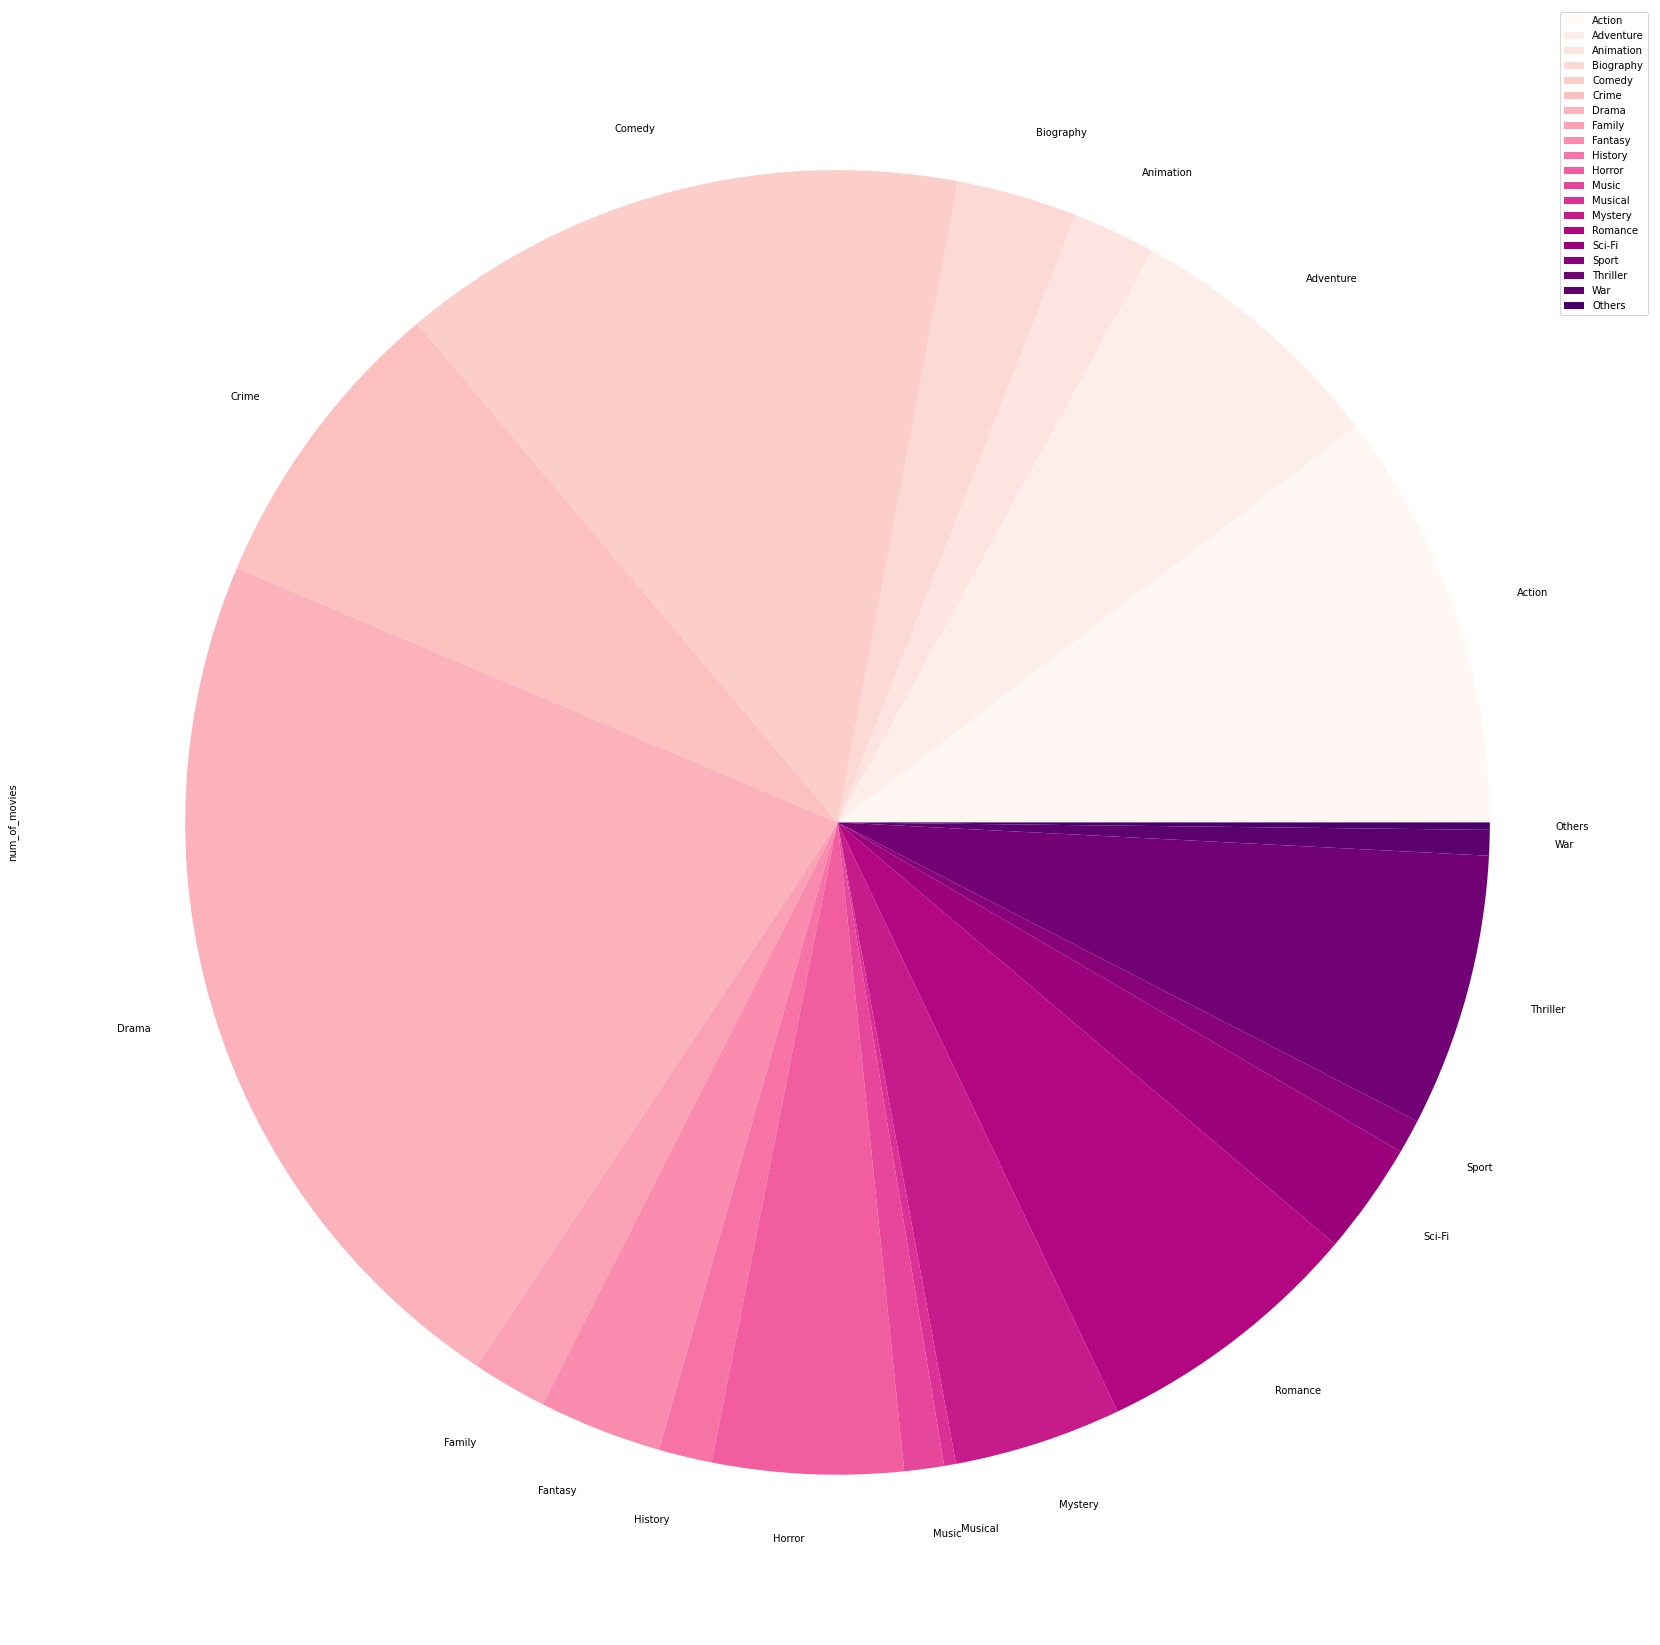

In [14]:
ax2 = data_genre_new.plot.pie(y = 'num_of_movies', figsize = (30,30), cmap='RdPu')

We count the number of films each genre has and plot a pie chart to show each genre's film number, countries with less than 30 films are shown in "others". The pie chart shows that the most popular film genre is drama, with 3142 movies. Comedy, action and crime also have more than 1000 films. Other genres such as thriller, romance, and adventure are a bit less and have more than nine hundred films.

## Relation between Film Budgets and Incomes

In [15]:
def currency_conv(col, df):
    # convert all currency into USD
    df_sub = []
    for ind in df.index:
        if(df.at[ind, col].isnumeric() == False):
            df_sub.append(df.loc[ind])
            df = df.drop(index=ind)
    df_sub = pd.DataFrame(df_sub, columns = df.columns)
    c = CurrencyConverter(decimal=True)
    for ind in df_sub.index:
        temp_str = df_sub.at[ind, col]
        currency = temp_str[0:3]
        amount = int(temp_str[3:].strip())
        try:
            converted = c.convert(amount, currency.strip(), 'USD', date=date(2022, 3, 31))
        except ValueError:
            df_sub = df_sub.drop(index=ind)
        except RateNotFoundError:
            df_sub = df_sub.drop(index=ind)
        else:
            df_sub.at[ind, col] = float(converted)

    #print(non_dollars.to_string())
    df = pd.concat([df, df_sub])
    df.sort_index()
    return df
    

In [16]:
def split_cols(colList):
    # separate two columns from the database
    imdb_sub = imdb.dropna(subset = colList)
    imdb_sub = imdb_sub[colList]
    return imdb_sub

In [17]:
print(imdb.columns)

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'reviews_from_users'],
      dtype='object')


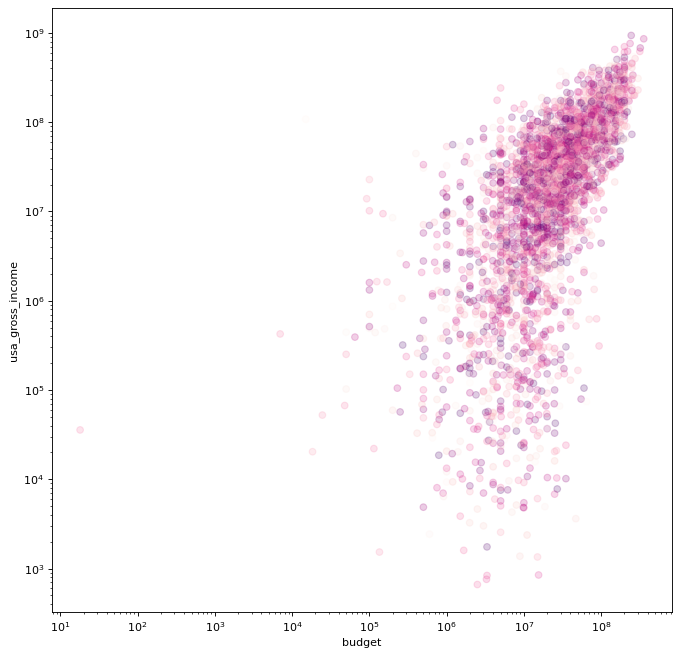

In [18]:
budget_usa_income = split_cols(['budget','usa_gross_income'])
budget_usa_income = currency_conv('budget', budget_usa_income)
# print(budget_usa_income)
relation_plot(budget_usa_income, xlog = True, ylog = True,figsize=(10,10))

This plot is about the relationship between budgets and USA gross incomes, and it shows that more budgets will bring more USA incomes for most films. Some movies have a minimal budget but earn more USA income, and some films have a huge budget but only earn a little USA income, but much less.

           budget worlwide_gross_income
0        48000000              76019048
1        22000000               5271666
5        45000000             224834564
6       100000000             333535934
7        12000000              56298474
...           ...                   ...
5373       923610                  3417
5383      24637.9              27590180
5384  2.63889e+06                536525
5422  5.93749e+06              39346577
5426  2.88626e+06               2027391

[4032 rows x 2 columns]


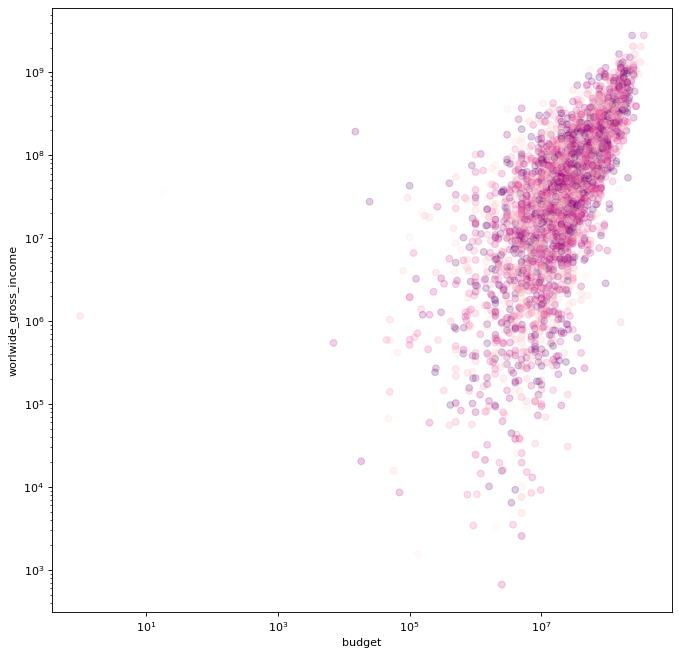

In [19]:
budget_income = split_cols(['budget','worlwide_gross_income'])
budget_income = currency_conv('budget', budget_income)
budget_income = currency_conv('worlwide_gross_income', budget_income)
print(budget_income)
relation_plot(budget_income, xlog=True, ylog = True,figsize=(10,10))

This plot is about the relationship between budgets and worldwide gross incomes. This plot is similar to the "budget vs. usa_gross_income" plot but more concentrated. It shows that more budgets will bring more USA incomes for most films. The number of films that cannot be applied to this observation is less than the above plot.

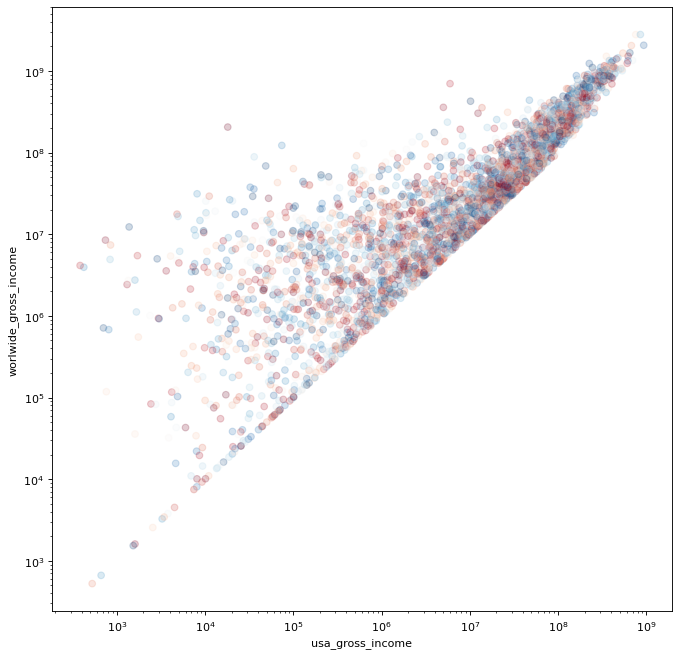

In [20]:
usa_world_income = split_cols(['usa_gross_income', 'worlwide_gross_income'])
usa_world_income = currency_conv('worlwide_gross_income', usa_world_income)
relation_plot(usa_world_income, cmap='RdBu', xlog=True, ylog=True, figsize=(10,10))

Then we also show the relation between USA gross incomes and worldwide gross incomes. There is an obvious line because the worldwide gross revenue is always larger than the USA's gross income. From 10^3 to 10^7, a lot of films have much more worldwide gross incomes than USA gross incomes. For movies with USA gross incomes larger than 10^7, their worldwide gross revenues have the same order of magnitude.

## Profit = income - budget

In [21]:
print(budget_income.shape)
print(type(budget_income))
print(budget_income)


(4032, 2)
<class 'pandas.core.frame.DataFrame'>
           budget worlwide_gross_income
0        48000000              76019048
1        22000000               5271666
5        45000000             224834564
6       100000000             333535934
7        12000000              56298474
...           ...                   ...
5373       923610                  3417
5383      24637.9              27590180
5384  2.63889e+06                536525
5422  5.93749e+06              39346577
5426  2.88626e+06               2027391

[4032 rows x 2 columns]


In [22]:
budget_and_income = split_cols(['budget','usa_gross_income','worlwide_gross_income'])
budget_and_income = currency_conv('budget', budget_and_income)
budget_and_income = currency_conv('worlwide_gross_income', budget_and_income)
print(budget_and_income)

           budget  usa_gross_income worlwide_gross_income
0        48000000        47121859.0              76019048
1        22000000         4274407.0               5271666
5        45000000       106834564.0             224834564
6       100000000       154696080.0             333535934
7        12000000        25885000.0              56298474
...           ...               ...                   ...
5339   3.4069e+07         7743794.0              31626978
5383      24637.9           52406.0              27590180
5384  2.63889e+06          182009.0                536525
5422  5.93749e+06         4186168.0              39346577
5426  2.88626e+06          817339.0               2027391

[3675 rows x 3 columns]


In [23]:
budget = np.array(budget_and_income["budget"].astype('float'))
worldIncome = np.array(budget_and_income["worlwide_gross_income"].astype('float'))
USIncome = np.array(budget_and_income["usa_gross_income"].astype('float'))
world_net_income = (worldIncome-budget).reshape((-1,))
usa_net_income = (USIncome-budget).reshape((-1,))
world_net_income = pd.DataFrame({"world_net_income": world_net_income})
usa_net_income = pd.DataFrame({"usa_net_income": usa_net_income})
# print(world_net_income)
# print(usa_net_income)

normalized_world = (world_net_income-world_net_income.mean())/world_net_income.std()
print(normalized_world)
normalized_usa = (usa_net_income-usa_net_income.mean())/usa_net_income.std()
print(normalized_usa)

      world_net_income
0            -0.304408
1            -0.557464
2             0.554140
3             0.857833
4            -0.212345
...                ...
3670         -0.476672
3671         -0.306973
3672         -0.474751
3673         -0.273927
3674         -0.467719

[3675 rows x 1 columns]
      usa_net_income
0          -0.205660
1          -0.510650
2           0.929629
3           0.800401
4           0.061597
...              ...
3670       -0.666328
3671       -0.189260
3672       -0.234240
3673       -0.221467
3674       -0.227217

[3675 rows x 1 columns]


## Keywords in descriptions

In [24]:
budget_and_income = split_cols(['budget','usa_gross_income','worlwide_gross_income','description', 'original_title', 'avg_vote'])
budget_and_income = currency_conv('budget', budget_and_income)
budget_and_income = currency_conv('worlwide_gross_income', budget_and_income)
budget_and_income = budget_and_income.reset_index(drop=True)
print(budget_and_income)

budget = np.array(budget_and_income["budget"].astype('float'))
world_income = np.array(budget_and_income["worlwide_gross_income"].astype('float'))
US_income = np.array(budget_and_income["usa_gross_income"].astype('float'))
world_net_income = (world_income-budget).reshape((-1,))
usa_net_income = (US_income-budget).reshape((-1,))
world_net_income = pd.DataFrame({"world_net_income": world_net_income})
usa_net_income = pd.DataFrame({"usa_net_income": usa_net_income})
print(world_net_income)
print(usa_net_income)

normalized_world = (world_net_income-world_net_income.mean())/world_net_income.std()
print(normalized_world)
normalized_usa = (usa_net_income-usa_net_income.mean())/usa_net_income.std()
print(normalized_usa)

           budget  usa_gross_income worlwide_gross_income  \
0        48000000        47121859.0              76019048   
1        22000000         4274407.0               5271666   
2        45000000       106834564.0             224834564   
3       100000000       154696080.0             333535934   
4        12000000        25885000.0              56298474   
...           ...               ...                   ...   
3670   3.4069e+07         7743794.0              31626978   
3671      24637.9           52406.0              27590180   
3672  2.63889e+06          182009.0                536525   
3673  5.93749e+06         4186168.0              39346577   
3674  2.88626e+06          817339.0               2027391   

                                            description  \
0     An English Duke from 1876 is inadvertedly drag...   
1     A young singer dates a disc jockey who helps h...   
2     When a cockerel apparently flies into a chicke...   
3     A group of astronauts gai

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(budget_and_income['avg_vote']).sort_values(by=['avg_vote'], ascending=False))

      avg_vote
1309       9.0
74         8.9
6          8.8
2100       8.8
75         8.7
276        8.6
1528       8.6
3313       8.6
3409       8.6
3559       8.5
1007       8.5
85         8.5
2839       8.5
1368       8.5
320        8.5
3340       8.5
3372       8.4
3096       8.4
3654       8.4
3153       8.4
993        8.4
3650       8.4
173        8.4
3097       8.4
2084       8.4
790        8.4
3515       8.4
2519       8.4
1625       8.4
2771       8.4
3391       8.3
2000       8.3
3673       8.3
771        8.3
3377       8.3
96         8.3
182        8.3
1153       8.3
2508       8.3
3367       8.3
2653       8.3
684        8.3
3197       8.2
3617       8.2
3423       8.2
2682       8.2
1148       8.2
388        8.2
3328       8.2
3647       8.2
1701       8.2
1840       8.2
2048       8.2
843        8.2
1311       8.2
2033       8.2
1763       8.2
718        8.2
1257       8.2
3429       8.2
2114       8.1
944        8.1
2539       8.1
2966       8.1
2923       8.1
3591      

In [26]:
descriptions = []
for string in budget_and_income.description:
    descriptions.append(string)
print(descriptions[0])
descriptions = pd.DataFrame({"description": descriptions})
# print(descriptions)
desp_prof = pd.concat((descriptions, normalized_world, pd.DataFrame(budget_and_income['original_title']),pd.DataFrame(budget_and_income['avg_vote'])),axis=1)
print(desp_prof)

An English Duke from 1876 is inadvertedly dragged to modern day New York where he falls for a plucky advertising executive.
                                            description  world_net_income  \
0     An English Duke from 1876 is inadvertedly drag...         -0.304408   
1     A young singer dates a disc jockey who helps h...         -0.557464   
2     When a cockerel apparently flies into a chicke...          0.554140   
3     A group of astronauts gain superpowers after a...          0.857833   
4     A biography of artist Frida Kahlo, who channel...         -0.212345   
...                                                 ...               ...   
3670  Beneath Anna Poliatova's striking beauty lies ...         -0.476672   
3671  Things go badly for a hack director and film c...         -0.306973   
3672  Two friends and a chirpy teenager take a road ...         -0.474751   
3673  Indian army special forces execute a covert op...         -0.273927   
3674  French dancers gather i

In [27]:
def split_words(col):
    array = []
    df_sub = imdb.dropna(subset = [col])
    for ind in df_sub.index:
        words = re.split('\s',df_sub.at[ind, col].lower())
        words = [word for word in words if len(word)!=0]
        words = [re.sub("[^a-zA-Z0-9']", '',word) for word in words]
        for word in words:
            if(word!=''):
                array.append(word)
            
    return np.unique(array, return_counts=True)

In [28]:
def split_words_with_prof(df, col, df_prof):
    array = []

    for ind in df.index:
        words = re.split('\s',df.at[ind, col].lower())
        words = [word for word in words if len(word)!=0]
        words = [re.sub("[^a-zA-Z0-9']", '',word) for word in words]
        for word in words:
            if(word!=''):
                cols = df_prof.columns
                # print(cols[0])
                array.append((word, float(df_prof.at[ind,cols[0]]), df.at[ind, 'original_title'], df.at[ind, 'avg_vote']))
    words_cnt = pd.DataFrame(array)
    cols = words_cnt.columns
    grouped_words = words_cnt.groupby([cols[0]])
    idx = grouped_words[cols[3]].transform(max) == df['']
    print(idx)
    
    return pd.DataFrame(grouped_words.sum())

In [29]:
stopwords = "i,me,my,myself,we,us,our,ours,ourselves,you,your,yours,yourself,yourselves,he,him,his,himself,she,her,hers,herself,it,its,itself,they,them,their,theirs,themselves,what,which,who,whom,whose,this,that,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,will,would,should,can,could,ought,i'm,you're,he's,she's,it's,we're,they're,i've,you've,we've,they've,i'd,you'd,he'd,she'd,we'd,they'd,i'll,you'll,he'll,she'll,we'll,they'll,isn't,aren't,wasn't,weren't,hasn't,haven't,hadn't,doesn't,don't,didn't,won't,wouldn't,shan't,shouldn't,can't,cannot,couldn't,mustn't,let's,that's,who's,what's,here's,there's,when's,where's,why's,how's,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,upon,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,say,says,said,shall,must".split(",")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'us', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'whose', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'will', 'would', 'should', 'can', 'could', 'ought', "i'm", "you're", "he's", "she's", "it's", "we're", "they're", "i've", "you've", "we've", "they've", "i'd", "you'd", "he'd", "she'd", "we'd", "they'd", "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "hadn't", "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", 'cannot', "couldn't", "mustn't", "let's", "that's", "who's", "what's", "here's", "there's", "when's", "where's", "why's", "how's", 'a', 'a

In [101]:
import re

array = []
df = desp_prof
df_prof = normalized_usa
col = "description"
for ind in df.index:
    words = re.split('\s',df.at[ind, col].lower())
    words = [word for word in words if len(word)!=0]
    words = [re.sub("[^a-zA-Z0-9']", '',word) for word in words]
    for word in words:
        if(word!='' and word not in stopwords):
            cols = df_prof.columns
            # print(cols[0])
            array.append((word, float(df_prof.at[ind,cols[0]]), df.at[ind, 'original_title'], df.at[ind, 'avg_vote']))
words_cnt = pd.DataFrame(array)

In [102]:
print(words_cnt)
cols = words_cnt.columns
print(cols)
grouped_words = words_cnt.groupby(by = [cols[0]])
print(len(grouped_words.groups))

                  0         1               2    3
0           english -0.205660  Kate & Leopold  6.4
1              duke -0.205660  Kate & Leopold  6.4
2              1876 -0.205660  Kate & Leopold  6.4
3      inadvertedly -0.205660  Kate & Leopold  6.4
4           dragged -0.205660  Kate & Leopold  6.4
...             ...       ...             ...  ...
55790     nightmare -0.227217          Climax  7.1
55791         learn -0.227217          Climax  7.1
55792       sangria -0.227217          Climax  7.1
55793         laced -0.227217          Climax  7.1
55794           lsd -0.227217          Climax  7.1

[55795 rows x 4 columns]
RangeIndex(start=0, stop=4, step=1)
12542


In [103]:
words_cnt_sorted = words_cnt.sort_values(by=[1,3], ascending=False)
print(words_cnt_sorted)
cols = words_cnt.columns
words_profs = words_cnt[[0,1]]
grouped_words = words_profs.groupby(by = [cols[0]]).sum()

wordList = grouped_words.sort_values(by = [1], ascending = False)
# first500Groups = pd.concat([grouped_words.get_group(x) for x in list(grouped_words.groups.keys())[:500]])
print(wordList)

               0          1                                           2    3
42968        new  12.331412  Star Wars: Episode VII - The Force Awakens  7.9
42969     threat  12.331412  Star Wars: Episode VII - The Force Awakens  7.9
42970     galaxy  12.331412  Star Wars: Episode VII - The Force Awakens  7.9
42971      rises  12.331412  Star Wars: Episode VII - The Force Awakens  7.9
42972        rey  12.331412  Star Wars: Episode VII - The Force Awakens  7.9
...          ...        ...                                         ...  ...
14182      woola  -3.392584                                 John Carter  6.6
14183   princess  -3.392584                                 John Carter  6.6
14184  desperate  -3.392584                                 John Carter  6.6
14185       need  -3.392584                                 John Carter  6.6
14186     savior  -3.392584                                 John Carter  6.6

[55795 rows x 4 columns]
                  1
0                  
family    

In [53]:
movieLink = pd.read_csv('movieLink.txt',sep="\n",header=None)
print(movieLink)

array = []
for ind in movieLink.index:
    terms = str(movieLink.at[ind,0]).split(';')
    # print(terms)
    array.append(terms)
movieLink = pd.DataFrame(array)
print(movieLink)
print(movieLink.at[0,0])

                                                      0
0     Singh Is Kinng;https://images-na.ssl-images-am...
1     Get Low;https://m.media-amazon.com/images/M/MV...
2     Next Friday;https://i.etsystatic.com/28533358/...
3     The Road to El Dorado;https://cdn.traileraddic...
4     The Road to El Dorado;https://cdn.traileraddic...
...                                                 ...
3931  47 Meters Down: Uncaged;http://de.web.img2.acs...
3932  A Dog's Journey;https://www.dvdsreleasedates.c...
3933  Gretel & Hansel;https://i.pinimg.com/originals...
3934  Charlie's Angels;https://picfiles.alphacoders....
3935  Missing Link;https://picfiles.alphacoders.com/...

[3936 rows x 1 columns]
                            0  \
0              Singh Is Kinng   
1                     Get Low   
2                 Next Friday   
3       The Road to El Dorado   
4       The Road to El Dorado   
...                       ...   
3931  47 Meters Down: Uncaged   
3932          A Dog's Journey   
3933  

In [104]:
wordList = wordList.reset_index()
wordList[1] = (wordList[1]-wordList[1].mean())/wordList[1].std()
print(wordList)
wordList = wordList.head(500)
print(wordList)

              0          1
0        family  25.551895
1           new  20.808433
2        school  17.211707
3          home  10.919786
4       friends   9.603649
...         ...        ...
12537     earth -10.290346
12538  american -10.364791
12539       war -10.821657
12540       man -11.902703
12541     young -18.862297

[12542 rows x 2 columns]
            0          1
0      family  25.551895
1         new  20.808433
2      school  17.211707
3        home  10.919786
4     friends   9.603649
..        ...        ...
495    marcus   1.665715
496    shares   1.663998
497  teenager   1.658280
498    status   1.657900
499  mentally   1.656179

[500 rows x 2 columns]


In [105]:
wordList[1] = wordList[1].round().astype(int)
print(wordList)

            0   1
0      family  26
1         new  21
2      school  17
3        home  11
4     friends  10
..        ...  ..
495    marcus   2
496    shares   2
497  teenager   2
498    status   2
499  mentally   2

[500 rows x 2 columns]


In [106]:
for ind in wordList.index:
    selected = words_cnt_sorted[words_cnt_sorted[0]==wordList.at[ind,0]].head(1).reset_index()
    # print(selected)
    wordList.at[ind, 2] = selected.at[0,2]
print(wordList)

            0   1                                             2
0      family  26                                 Incredibles 2
1         new  21    Star Wars: Episode VII - The Force Awakens
2      school  17                                    Spider-Man
3        home  11                                        Avatar
4     friends  10                                   Toy Story 4
..        ...  ..                                           ...
495    marcus   2                             Bad Boys for Life
496    shares   2  Star Wars: Episode II - Attack of the Clones
497  teenager   2                                  Transformers
498    status   2                               Pitch Perfect 2
499  mentally   2                                         Joker

[500 rows x 3 columns]


In [107]:
# print(ind)
# print(movieLink[movieLink[0]==wordList.at[ind,2]].head(1).reset_index(drop=True).at[0,1])
# wordList = wordList.drop(columns=[3])
print(wordList)
for ind in wordList.index:
    selected = movieLink[movieLink[0]==wordList.at[ind,2]].head(1).reset_index(drop=True)
    # print(selected)
    wordList.at[ind, 3] = selected.at[0,1]

            0   1                                             2
0      family  26                                 Incredibles 2
1         new  21    Star Wars: Episode VII - The Force Awakens
2      school  17                                    Spider-Man
3        home  11                                        Avatar
4     friends  10                                   Toy Story 4
..        ...  ..                                           ...
495    marcus   2                             Bad Boys for Life
496    shares   2  Star Wars: Episode II - Attack of the Clones
497  teenager   2                                  Transformers
498    status   2                               Pitch Perfect 2
499  mentally   2                                         Joker

[500 rows x 3 columns]


In [91]:
print(wordList)
wordList[1] = (wordList[1]-wordList[1].mean())/wordList[1].std()
print(wordList)

              0          1                                           2  \
0         world  86.708800                                      Avatar   
1           new  72.158983  Star Wars: Episode VII - The Force Awakens   
2        threat  42.257015  Star Wars: Episode VII - The Force Awakens   
3          team  37.769374                                The Avengers   
4          stop  32.341429                                The Avengers   
..          ...        ...                                         ...   
495      trials   4.881432                     The Fate of the Furious   
496      secret   4.873979                           The Da Vinci Code   
497     divided   4.859532       The Lord of the Rings: The Two Towers   
498    galactic   4.844075                              Captain Marvel   
499  incredible   4.838443                               Incredibles 2   

                                                     3  
0    https://image.tmdb.org/t/p/original/jRXYjXNq0C...

In [92]:
wordList[1] = wordList[1].round().astype(int)
print(wordList)

              0   1                                           2  \
0         world  11                                      Avatar   
1           new   9  Star Wars: Episode VII - The Force Awakens   
2        threat   5  Star Wars: Episode VII - The Force Awakens   
3          team   4                                The Avengers   
4          stop   3                                The Avengers   
..          ...  ..                                         ...   
495      trials  -1                     The Fate of the Furious   
496      secret  -1                           The Da Vinci Code   
497     divided  -1       The Lord of the Rings: The Two Towers   
498    galactic  -1                              Captain Marvel   
499  incredible  -1                               Incredibles 2   

                                                     3  
0    https://image.tmdb.org/t/p/original/jRXYjXNq0C...  
1    https://s.s-bol.com/imgbase0/imagebase3/extral...  
2    https://s.s-bol.com

In [100]:
f = open("content_world.txt", "w")
word_frq = "['{0}',{1},'{2}','{3}']"
f.write('[')
for ind in wordList.index:
    f.write(word_frq.format(wordList.at[ind, 0], wordList.at[ind, 1], wordList.at[ind, 2], wordList.at[ind, 3]))
    if(ind!=wordList.index[-1]): f.write(',\n')
f.write(']')
f.close()

In [ ]:
f = open("content_usa.txt", "w")
word_frq = "['{0}',{1},'{2}','{3}']"
f.write('[')
for ind in wordList.index:
    f.write(word_frq.format(wordList.at[ind, 0], wordList.at[ind, 1], wordList.at[ind, 2], wordList.at[ind, 3]))
    if(ind!=wordList.index[-1]): f.write(',\n')
f.write(']')
f.close()

In [ ]:
words = split_words_with_prof(desp_prof, "description" , normalized_world)

In [ ]:

words = pd.DataFrame(words[1]).sort_values(by = [1], ascending = False)

words_cnt = pd.DataFrame(words[1])
words_cnt.reset_index(inplace=True)
words_cnt = words_cnt.drop(index = 0)
words_cnt = words_cnt.drop(index = 1)
words_cnt = words_cnt.drop(index = 2)
words_cnt[1] = (words_cnt[1]-words_cnt[1].mean())/words_cnt[1].std()
words_cnt[1] = words_cnt[1].round().astype(int)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
print(words_cnt)

In [ ]:
list_ver = words_cnt[[0,1]].to_numpy()
print(type(list_ver[0][0]))
f = open("keywords_world.txt", "w")
word_frq = "['{0}',{1}]"
f.write('[')
for list in list_ver:
    if('\'' in list[0]): 
        index = list[0].find('\'')
        list[0] = list[0][:index] + '\\' + list[0][index:] 
    f.write(word_frq.format(list[0],list[1]))
    if(list[0]!=list_ver[-1][0]): f.write(',\n')
f.write(']')
f.close()

In [ ]:
words_usa = split_words_with_prof(desp_prof, "description" , normalized_usa)

words_usa = pd.DataFrame(words_usa[1]).sort_values(by = [1], ascending = False)

words_usa = pd.DataFrame(words_usa[1])
words_usa.reset_index(inplace=True)
words_usa = words_usa.drop(index = 0)
words_usa = words_usa.drop(index = 1)
words_usa = words_usa.drop(index = 2)
words_usa[1] = (words_usa[1]-words_usa[1].mean())/words_usa[1].std()
words_usa[1] = words_usa[1].round().astype(int)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(words_cnt)
list_ver = words_usa[[0,1]].to_numpy()
f = open("keywords_usa.txt", "w")
word_frq = "['{0}',{1}]"
f.write('[')
for list in list_ver:
    if('\'' in list[0]): 
        index = list[0].find('\'')
        list[0] = list[0][:index] + '\\' + list[0][index:]
    f.write(word_frq.format(list[0],list[1]))
    if(list[0]!=list_ver[-1][0]): f.write(',\n')
f.write(']')
f.close()

## Directors with published date and net profit

In [42]:
from datetime import datetime
# print(imdb.dtypes)
for ind in imdb.index:
    if(imdb.at[ind, 'date_published']!=None):  
        # print("converting: ", imdb.at[ind, 'date_published'])
        imdb.at[ind, 'date_published'] = datetime.strptime(imdb.at[ind, 'date_published'],'%d/%m/%Y')
# print(imdb.dtypes)

In [43]:
directors = imdb["director"]
print(directors)
# for director in directors:
#     if ',' in director:
#         print("found \',\' in", director)

0            James Mangold
1       Vondie Curtis-Hall
2             Kar-Wai Wong
3              David Mamet
4            Roy Andersson
               ...        
5482             Spike Lee
5483        Vince Marcello
5484         Jérémy Clapin
5485          Roger Kumble
5486         Michael Dowse
Name: director, Length: 5487, dtype: object


In [ ]:
from selenium import webdriver
import time
import os
import re
import requests
from PIL import Image
from PIL import UnidentifiedImageError
from io import BytesIO
from selenium.webdriver.common.by import By

class Crawler_google_images:
    # 初始化
    def __init__(self, keyword, keyword2, browser):
        keyword_url = keyword.replace('&', ' ').replace('?', ' ').replace('/', ' ').replace('+', ' ').replace('%',' ').replace('#',' ')
        # print("keyword_url: ", keyword_url)
        if(keyword2!=None):
            self.url = 'https://www.bing.com/images/search?q='+keyword_url+keyword2 +'&tbm=isch'
        else:
            self.url = 'https://www.bing.com/images/search?q='+keyword_url +'&tbm=isch'
        self.keyword = keyword
        self.browser = browser

    # 获得Chrome驱动，并访问url
    def init_browser(self):
        # 访问url
        browser.get(self.url)
        # 最大化窗口，之后需要爬取窗口中所见的所有图片
        browser.maximize_window()
        return browser

    #下载图片
    def get_image_url(self, browser,round=2):
        count = 0 #图片序号
        pos = 0
        for i in range(round):
            pos += 500
            # 向下滑动
            js = 'var q=document.documentElement.scrollTop=%d'%pos
            browser.execute_script(js)
            time.sleep(1)
            # 找到图片
            # html = browser.page_source#也可以抓取当前页面的html文本，然后用beautifulsoup来抓取
            #直接通过tag_name来抓取是最简单的，比较方便

            img_elements = browser.find_elements(By.CLASS_NAME, 'iusc')
            # print(img_elements)
            for img_element in img_elements:
                m = img_element.get_attribute('m')
                # print(m)
                try:
                    img_url = re.findall("murl\":\"https?://[^\s]*.jpg", m)
                    # print(img_url[0][7:])
                    img_url = img_url[0][7:]
                except (TypeError, IndexError):
                    # print("No match for img_url, finding next")
                    continue
                try:
                    r = requests.get(img_url)
                    img = Image.open(BytesIO(r.content))
                    width, height = img.size
                    # print("width: ", width , ", height: ", height)
                    if(height>width):
                        return img_url
                except UnidentifiedImageError:
                    # print("UnidentifiedImageError, finding next")
                    continue
                except (requests.exceptions.ConnectionError, requests.exceptions.SSLError, requests.exceptions.TooManyRedirects):
                    continue
                    # print("requests exceptions, finding next")
                #防止反爬机制
                time.sleep(0.2)

    def run(self):
        browser = self.init_browser()
        image_url = self.get_image_url(browser,10)#可以修改爬取的页面数，基本10页是100多张图片
        # browser.close()
        return image_url


def fetchImage(browser,keyword = 'Your Name.', keyword2=None):
    # print("fetching image for ", keyword)
    craw = Crawler_google_images(keyword,keyword2, browser)
    return craw.run()

In [ ]:
signs = ['%', '#']
for ind in imdb.index:
    for operand in signs:
        if(operand in imdb.at[ind,"original_title"]): print(imdb.at[ind,"original_title"])
        if(operand in imdb.at[ind,"director"]): print(imdb.at[ind,"director"])



In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-infobars")
browser = webdriver.Chrome(chrome_options=chrome_options)
keyword = 'Tristan + Isolde'
fetchImage(browser, keyword, ' film poster')

'https://i.pinimg.com/originals/5a/ec/aa/5aecaa653d03cfef157fcb1abad0ad5a.jpg'

In [44]:
director_prof = split_cols(['original_title','budget','usa_gross_income','worlwide_gross_income','director','date_published'])
director_prof = currency_conv('budget', director_prof)
director_prof = currency_conv('worlwide_gross_income', director_prof)
director_prof = director_prof.reset_index()

# print(director_prof.dtypes)
budget = np.array(director_prof["budget"].astype('float'))
world_income = np.array(director_prof["worlwide_gross_income"].astype('float'))
US_income = np.array(director_prof["usa_gross_income"].astype('float'))
world_net_income = (world_income-budget).reshape((-1,))
usa_net_income = (US_income-budget).reshape((-1,))
world_net_income = pd.DataFrame({"world_net_income": world_net_income})
usa_net_income = pd.DataFrame({"usa_net_income": usa_net_income})
# print(world_net_income)
# print(usa_net_income)
print(director_prof)

      index            original_title       budget  usa_gross_income  \
0         0            Kate & Leopold     48000000        47121859.0   
1         1                   Glitter     22000000         4274407.0   
2         5               Chicken Run     45000000       106834564.0   
3         6            Fantastic Four    100000000       154696080.0   
4         7                     Frida     12000000        25885000.0   
...     ...                       ...          ...               ...   
3670   5339                      Anna   3.4069e+07         7743794.0   
3671   5383       Kamera wo tomeruna!      24637.9           52406.0   
3672   5384                   Karwaan  2.63889e+06          182009.0   
3673   5422  Uri: The Surgical Strike  5.93749e+06         4186168.0   
3674   5426                    Climax  2.88626e+06          817339.0   

     worlwide_gross_income               director       date_published  
0                 76019048          James Mangold  2002-03-01 

In [ ]:
for ind in director_prof.index:
    if(director_prof.at[ind, 'original_title'] == 'In the Bedroom'):
        print(ind)
        print(director_prof.loc[ind,:])

292
index                                    344
original_title                In the Bedroom
budget                               1700000
usa_gross_income                 3.59306e+07
worlwide_gross_income               44763181
director                          Todd Field
date_published           2002-03-15 00:00:00
Name: 292, dtype: object


In [ ]:
def split_names_with_prof(df_prof):
    array = []
    f = open("directors_new.txt", "w+")
    f.write('[')
    
    word_frq = "[{0},{1},{2},{3},'{4}', '{5}', '{6}','{7}']"
    for ind in range(293, len(director_prof.index)):
        # print("indexing ", ind)
        names = re.split(',', director_prof.at[ind, 'director'])
        for name in names:
            if(name!=''):
                cols = df_prof.columns
                link_director = fetchImage(browser, name, ' director')
                link_poster = fetchImage(browser, director_prof.at[ind, 'original_title'], ' film poster')
                # print("link for director: ", link_director)
                # print("link for poster: ", link_poster)
                date_temp = director_prof.at[ind, 'date_published']
                formatted_str = word_frq.format(date_temp.year, date_temp.month, date_temp.day, df_prof.at[ind, cols[0]], name, director_prof.at[ind, 'original_title'], link_director, link_poster)
                print(formatted_str)
                f.write(formatted_str)
                f.write(',\n')
                array.append([name, date_temp, df_prof.at[ind, cols[0]],director_prof.at[ind, 'original_title']])
    f.write(']')
    f.close()
    print("fetching over")
    return


In [ ]:
director_prof_world = split_names_with_prof(world_net_income)
# print(director_prof_world)
director_prof_world = director_prof_world.sort_values(by=[2])

In [34]:
director_prof_world = pd.read_csv('directors_2.txt',sep="\n",header=None)
print(director_prof_world)

                                                      0
0     2002; 3; 1; 28019048; James Mangold; Kate & Le...
1     2001; 11; 30; -16728334; Vondie Curtis-Hall; G...
2     2000; 12; 15; 179834564; Peter Lord; Chicken R...
3     2000; 12; 15; 179834564;  Nick Park; Chicken R...
4     2005; 9; 16; 233535934; Tim Story; Fantastic F...
...                                                 ...
3931  2019; 6; 21; -2441991; Luc Besson; Anna; https...
3932  2018; 11; 7; 27565542.136568766; Shin'ichirô U...
3933  2018; 8; 3; -2102360.5872774385; Akarsh Khuran...
3934  2019; 1; 11; 33409084.428625762; Aditya Dhar; ...
3935  2019; 6; 13; -858869; Gaspar Noé; Climax; http...

[3936 rows x 1 columns]


In [35]:
array = []
for ind in director_prof_world.index:
    terms = str(director_prof_world.at[ind,0]).split(';')
    # print(terms)
    array.append(terms)

In [36]:
for texts in array:
    if(len(texts)>8):print(texts)

In [37]:
director_prof_world = pd.DataFrame(array)
director_prof_world = director_prof_world.sort_values(by = [0,1,2])
print(director_prof_world)

         0    1    2                    3                  4  \
3766  1905    6   30   28421076.285184436       Anees Bazmee   
2038  1905    7    6              3522511    Aaron Schneider   
158   2000    1   12             48827328         Steve Carr   
38    2000   10   13            -18567273      Bibo Bergeron   
39    2000   10   13            -18567273           Don Paul   
...    ...  ...  ...                  ...                ...   
3588  2020    7    1             34783103   Johannes Roberts   
3625  2020    7    1             59790499       Gail Mancuso   
3635  2020    8   19             16966625         Oz Perkins   
3434  2020    8    6             25279888    Elizabeth Banks   
3537  2020    9   17            -73750531       Chris Butler   

                             5  \
3766            Singh Is Kinng   
2038                   Get Low   
158                Next Friday   
38       The Road to El Dorado   
39       The Road to El Dorado   
...                        

In [38]:
print(director_prof_world.reset_index(drop=True))

         0    1    2                    3                  4  \
0     1905    6   30   28421076.285184436       Anees Bazmee   
1     1905    7    6              3522511    Aaron Schneider   
2     2000    1   12             48827328         Steve Carr   
3     2000   10   13            -18567273      Bibo Bergeron   
4     2000   10   13            -18567273           Don Paul   
...    ...  ...  ...                  ...                ...   
3931  2020    7    1             34783103   Johannes Roberts   
3932  2020    7    1             59790499       Gail Mancuso   
3933  2020    8   19             16966625         Oz Perkins   
3934  2020    8    6             25279888    Elizabeth Banks   
3935  2020    9   17            -73750531       Chris Butler   

                             5  \
0               Singh Is Kinng   
1                      Get Low   
2                  Next Friday   
3        The Road to El Dorado   
4        The Road to El Dorado   
...                        

In [40]:
def split_names_with_prof_copy(df_prof):
    array = []
    for ind in director_prof.index:
        # print("indexing ", ind)
        names = re.split(',', director_prof.at[ind, 'director'])
        for name in names:
            if(name!=''):
                cols = df_prof.columns
                # director_copy = director_prof_world[director_prof_world[4]==name].sort_index()
                # print()
                # movie_copy = director_prof_world[director_prof_world[5]==director_prof.at[ind, 'original_title']].sort_index()
                # if(not director_copy.empty):
                #     link_director = director_copy.at[0,6]
                # else:
                #     link_director = fetchImage(browser, name, ' director')
                #     print("fetched director image for ", name)
                # if(not movie_copy.empty):  
                #     link_poster = movie_copy.at[0,7]
                # else:
                #     link_poster = fetchImage(browser, director_prof.at[ind, 'original_title'], ' film poster')
                #     print("fetched movie poster for ", director_prof.at[ind, 'original_title'])
                date_temp = director_prof.at[ind, 'date_published']
                array.append([date_temp.year, date_temp.month, date_temp.day, df_prof.at[ind, cols[0]], name, director_prof.at[ind, 'original_title']])
    return pd.DataFrame(array)


In [45]:
director_prof_usa = split_names_with_prof_copy(usa_net_income)
director_prof_usa = director_prof_usa.sort_values(by=[0,1,2])
print(director_prof_usa.reset_index(drop=True))

         0  1   2             3                 4                         5
0     1905  6  30  1.410775e+06      Anees Bazmee            Singh Is Kinng
1     1905  7   6  2.176933e+06   Aaron Schneider                   Get Low
2     2000  1  12  4.632860e+07        Steve Carr               Next Friday
3     2000  2  25 -1.021497e+07       Danny Boyle                 The Beach
4     2000  3  31 -7.940011e+06       Wim Wenders  The Million Dollar Hotel
...    ... ..  ..           ...               ...                       ...
3931  2020  7   1  1.026090e+07  Johannes Roberts   47 Meters Down: Uncaged
3932  2020  7   1  6.782371e+06      Gail Mancuso           A Dog's Journey
3933  2020  8   6 -3.019692e+07   Elizabeth Banks          Charlie's Angels
3934  2020  8  19  1.034765e+07        Oz Perkins           Gretel & Hansel
3935  2020  9  17 -8.335046e+07      Chris Butler              Missing Link

[3936 rows x 6 columns]


In [46]:
for ind in director_prof_usa.index:
    director_prof_usa.at[ind, 6] = director_prof_world.at[ind, 6]
    director_prof_usa.at[ind, 7] = director_prof_world.at[ind, 7]
print(director_prof_usa)

         0  1   2             3                 4                         5  \
3766  1905  6  30  1.410775e+06      Anees Bazmee            Singh Is Kinng   
2038  1905  7   6  2.176933e+06   Aaron Schneider                   Get Low   
158   2000  1  12  4.632860e+07        Steve Carr               Next Friday   
71    2000  2  25 -1.021497e+07       Danny Boyle                 The Beach   
9     2000  3  31 -7.940011e+06       Wim Wenders  The Million Dollar Hotel   
...    ... ..  ..           ...               ...                       ...   
3588  2020  7   1  1.026090e+07  Johannes Roberts   47 Meters Down: Uncaged   
3625  2020  7   1  6.782371e+06      Gail Mancuso           A Dog's Journey   
3434  2020  8   6 -3.019692e+07   Elizabeth Banks          Charlie's Angels   
3635  2020  8  19  1.034765e+07        Oz Perkins           Gretel & Hansel   
3537  2020  9  17 -8.335046e+07      Chris Butler              Missing Link   

                                                   

In [51]:
f = open("movieLink.txt", "w")
word_format = "{0};{1}\n"
for ind in director_prof_world.index:
    f.write(word_format.format(director_prof_world.at[ind, 5].lstrip(), director_prof_world.at[ind, 7].lstrip()))
f.close()

In [ ]:
f = open("directors3.txt", "w")
word_frq = "[{0},{1},{2},{3},'{4}','{5}','{6}','{7}']"
f.write('[')
for ind in director_prof_world.index:
    f.write(word_frq.format(director_prof_world.at[ind, 0], director_prof_world.at[ind, 1], director_prof_world.at[ind, 2], director_prof_world.at[ind, 3], director_prof_world.at[ind, 4],director_prof_world.at[ind, 5],director_prof_world.at[ind, 6],director_prof_world.at[ind, 7]))
    if(ind!=director_prof_world.index[-1]): f.write(',\n')
f.write(']')
f.close()

In [ ]:
f = open("directors_usa_new.txt", "w")
word_frq = "[{0},{1},{2},{3},'{4}','{5}','{6}','{7}']"
f.write('[')
for ind in director_prof_usa.index:
    f.write(word_frq.format(director_prof_usa.at[ind, 0], director_prof_usa.at[ind, 1], director_prof_usa.at[ind, 2], director_prof_usa.at[ind, 3], director_prof_usa.at[ind, 4],director_prof_usa.at[ind, 5],director_prof_usa.at[ind, 6],director_prof_usa.at[ind, 7]))
    if(ind!=director_prof_usa.index[-1]): f.write(',\n')
f.write(']')
f.close()

## published month/quarter and average net profit (stacked bar chart 11.page 14)

* January, February, and March (Q1)
* April, May, and June (Q2)
* July, August, and September (Q3)
* October, November, and December (Q4)

In [ ]:
season_prof = split_cols(['budget','usa_gross_income','worlwide_gross_income','date_published'])
season_prof = currency_conv('budget', season_prof)
season_prof = currency_conv('worlwide_gross_income', season_prof)
season_prof = season_prof.reset_index()
# print(season_prof)
# print(type(season_prof.date_published[0]))
# print(season_prof.date_published[0])
# print(season_prof.date_published[0].year)
# print(type(season_prof.date_published[0].year))
# print(season_prof.date_published[0].month)
# print(type(season_prof.date_published[0].month))

budget = np.array(season_prof["budget"].astype('float'))
world_income = np.array(season_prof["worlwide_gross_income"].astype('float'))
US_income = np.array(season_prof["usa_gross_income"].astype('float'))
world_net_income = (world_income-budget).reshape((-1,))
usa_net_income = (US_income-budget).reshape((-1,))
world_net_income = pd.DataFrame({"world_net_income": world_net_income})
usa_net_income = pd.DataFrame({"usa_net_income": usa_net_income})
# print(world_net_income)
# print(usa_net_income)

season_prof_world = pd.concat([season_prof['date_published'], world_net_income], axis =1)
# print(season_prof_world)

year = []
quarter = []
for ind in season_prof_world.index:
    year.append(season_prof_world.at[ind, 'date_published'].year)
    month = season_prof_world.at[ind, 'date_published'].month
    if(1<=month<=3): quarter.append(1)
    elif(4<=month<=6): quarter.append(2)
    elif(7<=month<=9): quarter.append(3)
    else: quarter.append(4)

season_prof_world['year_published'] = year
season_prof_world['quarter_published'] = quarter
season_prof_world = season_prof_world.drop(columns=['date_published'])
# print(season_prof_world)
season_avg = season_prof_world.groupby(['year_published', 'quarter_published']).mean()
# print(season_avg)
output_world = season_avg.reset_index(level = ['year_published', 'quarter_published'])

season_prof_usa = pd.concat([season_prof['date_published'], usa_net_income], axis =1)
# print(season_prof_world)

year = []
quarter = []
for ind in season_prof_usa.index:
    year.append(season_prof_usa.at[ind, 'date_published'].year)
    month = season_prof_usa.at[ind, 'date_published'].month
    if(1<=month<=3): quarter.append(1)
    elif(4<=month<=6): quarter.append(2)
    elif(7<=month<=9): quarter.append(3)
    else: quarter.append(4)

season_prof_usa['year_published'] = year
season_prof_usa['quarter_published'] = quarter
season_prof_usa = season_prof_usa.drop(columns=['date_published'])
# print(season_prof_world)
season_avg_usa = season_prof_usa.groupby(['year_published', 'quarter_published']).mean()
output_usa = season_avg_usa.reset_index(level = ['year_published', 'quarter_published'])

In [ ]:
from selenium import webdriver
import time
import os
import re
import requests
from PIL import Image
from PIL import UnidentifiedImageError
from io import BytesIO
from selenium.webdriver.common.by import By

class Crawler_google_images:
    # 初始化
    def __init__(self, keyword, browser):
        self.url = 'https://www.bing.com/images/search?q='+keyword +' film poster'+'&tbm=isch'
        self.keyword = keyword
        self.browser = browser

    # 获得Chrome驱动，并访问url
    def init_browser(self):
        # 访问url
        browser.get(self.url)
        # 最大化窗口，之后需要爬取窗口中所见的所有图片
        browser.maximize_window()
        return browser

    #下载图片
    def get_image_url(self, browser,round=2):
        count = 0 #图片序号
        pos = 0
        for i in range(round):
            pos += 500
            # 向下滑动
            js = 'var q=document.documentElement.scrollTop=%d'%pos
            browser.execute_script(js)
            time.sleep(1)
            # 找到图片
            # html = browser.page_source#也可以抓取当前页面的html文本，然后用beautifulsoup来抓取
            #直接通过tag_name来抓取是最简单的，比较方便

            img_elements = browser.find_elements(By.CLASS_NAME, 'iusc')
            # print(img_elements)
            for img_element in img_elements:
                m = img_element.get_attribute('m')
                # print(m)
                try:
                    img_url = re.findall("murl\":\"https?://[^\s]*.jpg", m)
                    # print(img_url[0][7:])
                    img_url = img_url[0][7:]
                except (TypeError, IndexError):
                    print("No match for img_url, finding next")
                    continue
                try:
                    r = requests.get(img_url)
                    img = Image.open(BytesIO(r.content))
                    width, height = img.size
                    # print("width: ", width , ", height: ", height)
                    if(height>width):
                        return img_url
                except UnidentifiedImageError:
                    print("UnidentifiedImageError, finding next")
                    continue
                

                #防止反爬机制
                time.sleep(0.2)

    def run(self):
        browser = self.init_browser()
        image_url = self.get_image_url(browser,10)#可以修改爬取的页面数，基本10页是100多张图片
        # browser.close()
        return image_url


def fetchImage(browser,keyword = 'Your Name.'):
    craw = Crawler_google_images(keyword, browser)
    return craw.run()

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-infobars")
browser = webdriver.Chrome(chrome_options=chrome_options)
fetchImage(browser, 'Gladiator', ' actor')

'https://i.pinimg.com/originals/5a/21/b8/5a21b8416454d5760387ddc79682a1ed.jpg'

In [ ]:
movieId = split_cols(['original_title','description','date_published', 'avg_vote'])
movieId = movieId.sort_values(by = ['avg_vote'], ascending=False).dropna()
# print(movieId)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-infobars")
browser = webdriver.Chrome(chrome_options=chrome_options)
def addMovieId(output):
    # print(movieId)
    def tryGetImage(ind, cnt, ind2):
        try: 
            output.at[ind, cnt] = movieId.at[ind2, 'original_title']
            output.at[ind, 'image %d'%cnt] =fetchImage(browser, movieId.at[ind2, 'original_title'])
            print("Get image for "+movieId.at[ind2, 'original_title'])
        except (requests.exceptions.SSLError):
            print("SSLError for ", movieId.at[ind2, 'original_title'])

    for ind in output.index:
        cnt = 0
        pYear = output.at[ind, 'year_published']
        pQuar = output.at[ind, 'quarter_published']
        # if(ind == 80): print("year ", pYear, " quarter ", pQuar)
        # print("for movies in year ", pYear, " Quarter ", pQuar)
        for ind2 in movieId.index:
            year = movieId.at[ind2, 'date_published'].year
            month = movieId.at[ind2, 'date_published'].month
            # if(ind == 80 ): 
                # print(cnt)
                # print("year ", year, " month ", month)
            if(pYear == year):
                if(pQuar == 1):
                    if(1<=month<=3):
                        tryGetImage(ind,cnt,ind2)
                        cnt = cnt+1
                elif(pQuar==2): 
                    if(4<=month<=6):
                        tryGetImage(ind,cnt,ind2)
                        cnt = cnt+1
                elif(pQuar ==3):
                    if(7<=month<=9):
                        tryGetImage(ind,cnt,ind2)
                        cnt = cnt+1
                else:
                    if(10<=month<=12):
                        tryGetImage(ind,cnt,ind2)
                        cnt = cnt+1
                
            if(cnt>1): break
        # print("ind: ", ind, " cnt: ", cnt)
    return output

output_world = addMovieId(output_world)


Get image for Stranger: Mukô hadan
Get image for Vizontele Tuuba
Get image for Sennen joyû
Get image for Get Low
Get image for Hera Pheri
Get image for Hey Ram
Get image for Gladiator
Get image for Erin Brockovich
Get image for O Auto da Compadecida
SSLError for  Gongdong gyeongbi guyeok JSA
Get image for Requiem for a Dream
Get image for Fa yeung nin wah
No match for img_url, finding next
Get image for Memento
Get image for Snatch
Get image for Almost Famous
Get image for Remember the Titans
Get image for Yi yi
Get image for Dil Chahta Hai
Get image for Hedwig and the Angry Inch
Get image for Ocean's Eleven
Get image for The Lord of the Rings: The Fellowship of the Ring
Get image for Filantropica
Get image for The Legend of Bhagat Singh
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No matc

In [ ]:
output_usa = addMovieId(output_usa)

Get image for Stranger: Mukô hadan
Get image for Vizontele Tuuba
Get image for Sennen joyû
Get image for Get Low
Get image for Hera Pheri
Get image for Hey Ram
Get image for Gladiator
Get image for Erin Brockovich
Get image for O Auto da Compadecida
SSLError for  Gongdong gyeongbi guyeok JSA
Get image for Requiem for a Dream
Get image for Fa yeung nin wah
No match for img_url, finding next
Get image for Memento
Get image for Snatch
Get image for Almost Famous
Get image for Remember the Titans
Get image for Yi yi
Get image for Dil Chahta Hai
Get image for Hedwig and the Angry Inch
Get image for Ocean's Eleven
Get image for The Lord of the Rings: The Fellowship of the Ring
Get image for Filantropica
Get image for The Legend of Bhagat Singh
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No match for img_url, finding next
No matc

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(output_world)


    year_published  quarter_published  world_net_income  \
0             1905                  2      2.842108e+07   
1             1905                  3      3.522511e+06   
2             2000                  1      4.499673e+07   
3             2000                  2      6.016836e+07   
4             2000                  3      5.013024e+07   
5             2000                  4      6.309954e+07   
6             2001                  1      7.543399e+07   
7             2001                  2      3.939305e+07   
8             2001                  3      4.319703e+07   
9             2001                  4      7.655980e+07   
10            2002                  1      5.762142e+07   
11            2002                  2      6.813299e+07   
12            2002                  3      3.949938e+07   
13            2002                  4      6.653193e+07   
14            2003                  1      7.308186e+07   
15            2003                  2      5.618847e+07 

In [ ]:
print(output_world)
print(output_usa)
for ind in output_world.index:
    if(output_world.at[ind, 'world_net_income']<0): print(ind)

    year_published  quarter_published  world_net_income  \
0             1905                  2      2.842108e+07   
1             1905                  3      3.522511e+06   
2             2000                  1      4.499673e+07   
3             2000                  2      6.016836e+07   
4             2000                  3      5.013024e+07   
..             ...                ...               ...   
80            2019                  3      1.592615e+08   
81            2019                  4      1.740951e+08   
82            2020                  1      6.623223e+07   
83            2020                  2      1.486011e+07   
84            2020                  3      1.261392e+07   

                           0  \
0       Stranger: Mukô hadan   
1                Sennen joyû   
2                 Hera Pheri   
3                  Gladiator   
4      O Auto da Compadecida   
..                       ...   
80                Chhichhore   
81              Gisaengchung   
82 

In [ ]:
f = open("quarters_world.txt", "w")
word_frq = "[{0},{1},{2},'{3}','{4}','{5}', '{6}']"
f.write('[')
for ind in output_world.index:
    f.write(word_frq.format(output_world.at[ind, 'year_published'], output_world.at[ind, 'quarter_published'], output_world.at[ind, 'world_net_income'], output_world.at[ind, 0],output_world.at[ind, 1],output_world.at[ind, 'image 0'], output_world.at[ind, 'image 1']))
    if(ind!=output_world.index[-1]): f.write(',\n')
f.write(']')
f.close()

In [ ]:
f = open("quarters_usa.txt", "w")
word_frq = "[{0},{1},{2},'{3}','{4}','{5}', '{6}']"
f.write('[')
for ind in output_usa.index:
    f.write(word_frq.format(output_usa.at[ind, 'year_published'], output_usa.at[ind, 'quarter_published'], output_usa.at[ind, 'usa_net_income'],output_usa.at[ind, 0],output_usa.at[ind, 1],output_world.at[ind, 'image 0'], output_world.at[ind, 'image 1']))
    if(ind!=output_usa.index[-1]): f.write(',\n')
f.write(']')
f.close()

## Keywords in descriptions

In [ ]:
print(imdb.description[0])
descriptions = []
for string in imdb.description:
    descriptions.append(string)
print(descriptions[0])

An English Duke from 1876 is inadvertedly dragged to modern day New York where he falls for a plucky advertising executive.
An English Duke from 1876 is inadvertedly dragged to modern day New York where he falls for a plucky advertising executive.


In [ ]:
def split_words(col):
    array = []
    imdb_sub = imdb.dropna(subset = [col])
    for ind in imdb_sub.index:
        words = re.split('\s',imdb_sub.at[ind, col].lower())
        words = [word for word in words if len(word)!=0]
        words = [re.sub("[^a-zA-Z0-9']", '',word) for word in words]
        for word in words:
            if(word!=''):
                array.append(word)
            
    return np.unique(array, return_counts=True)

In [ ]:
print(imdb[imdb["title"] == 'Your Name.'])

     imdb_title_id       title  original_title  year       date_published  \
5000     tt5311514  Your Name.  Kimi no na wa.  2016  2017-01-23 00:00:00   

                          genre  duration country language_1 language_2  ...  \
5000  Animation, Drama, Fantasy       106   Japan   Japanese        NaN  ...   

              actors_1                             actors_f2  \
5000  Ryûnosuke Kamiki  Ryûnosuke Kamiki, Mone Kamishiraishi   

                                            description  \
5000  Two strangers find themselves linked in a biza...   

                             desc35 avg_vote   votes         budget  \
5000  Two strangers find themselves      8.4  178480  JPY 370000000   

     usa_gross_income  worlwide_gross_income  reviews_from_users  
5000        5017246.0              358922706               664.0  

[1 rows x 24 columns]


In [ ]:
words, words_cnt = split_words("description")
words = np.reshape(words, (words.shape[0],1))
words_cnt = np.reshape(words_cnt, (words_cnt.shape[0],1))
words = np.concatenate((words, words_cnt),axis=1)

data= pd.DataFrame({"words": words[:,0], "num": words[:,1].astype(np.int)})
data = data.sort_values(by = ['num'], ascending = False)

print(data) 

            words   num
371             a  9026
14190         the  6654
14374          to  4852
9997           of  4179
863           and  3593
...           ...   ...
7058         ichi     1
7060        icons     1
7066    idealized     1
7068   identifies     1
7939      kenichi     1

[15878 rows x 2 columns]


## Relation between Film Budgets and Average Votes

In [ ]:
budget_avg_votes = imdb.dropna(subset = ['budget', 'avg_vote'])

budget_avg_votes = budget_avg_votes[['budget', 'avg_vote']]
budget_avg_votes = budget_avg_votes.astype({'avg_vote': float})
non_dollars = []

for ind in budget_avg_votes.index:
    if(budget_avg_votes.loc[ind].budget.isnumeric() == False):
        non_dollars.append([budget_avg_votes.loc[ind].budget.strip(),budget_avg_votes.loc[ind].avg_vote])
        budget_avg_votes = budget_avg_votes.drop(index=ind)

non_dollars = pd.DataFrame(non_dollars, columns = ['budget', 'avg_vote'])

c = CurrencyConverter(decimal=True)
from currency_converter import RateNotFoundError
from datetime import date
for ind in non_dollars.index:
    if(ind == 460):
        print("460: ", non_dollars.loc[ind])
    temp_str = non_dollars.loc[ind].budget
    currency = temp_str[0:3]
    amount = int(temp_str[3:].strip())
    # print("currency: ", currency, " amount: ", amount)
    try:
        converted = c.convert(amount, currency.strip(), 'USD', date=date(2022, 3, 31))
        # print("converted: ", converted)
        # print("After conversion: ",non_dollars.loc[ind].budget)
    except ValueError:
        non_dollars = non_dollars.drop(index=ind)
        # print("Row Dropped")
    except RateNotFoundError:
        non_dollars = non_dollars.drop(index=ind)
    else:
        non_dollars.at[ind, 'budget'] = float(converted)

#print(non_dollars.to_string())
#budget_avg_votes = pd.concat([budget_avg_votes, non_dollars])
#budget_avg_votes.sort_index()
#print("-----FINALLY-------")
#print(budget_avg_votes.to_string())

460:  budget      JPY 3000000
avg_vote            7.7
Name: 460, dtype: object


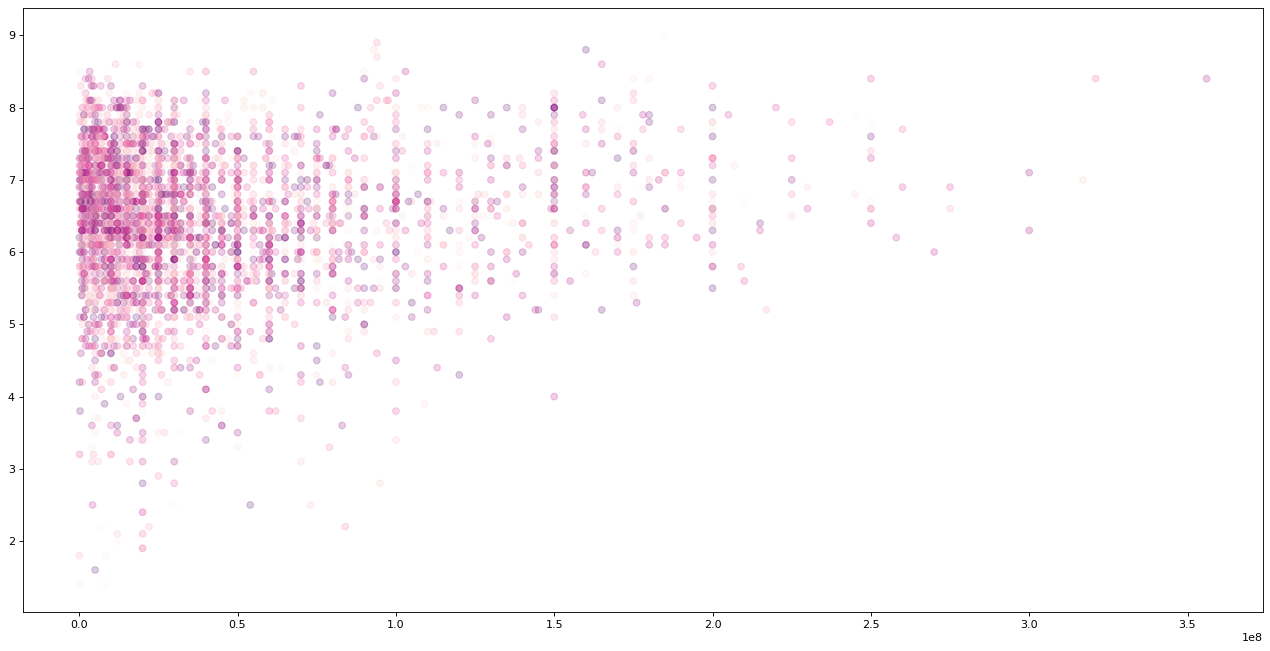

In [ ]:
colors = np.random.rand(len(budget_avg_votes))

fig = plt.figure(figsize=(20, 10), dpi=80)
ax = plt.gca()
ax.scatter(budget_avg_votes.budget.astype(int), budget_avg_votes.avg_vote,c=colors, alpha = 0.2, cmap = 'RdPu')
plt.show()

This plot is about the relation between film budgets and average votes. The average votes are between 0 to 9, and it shows that between 0.0 to 0.5xle8 level budgets, most films get votes between 5 and 9. Other than these films, there is a trend that more budgets will result in higher votes. Films with budgets larger than 1.5xle8 are all had votes higher than 5.

## Number of Films for Each Language

In [ ]:
films_per_language1 = imdb[["imdb_title_id", "language_1"]].groupby("language_1").count()
films_per_language1 = pd.DataFrame(films_per_language1).reset_index()
films_per_language1.columns = ['language', 'num_of_films']
films_per_language1

films_per_language2 = imdb[["imdb_title_id", "language_2"]].groupby("language_2").count()
films_per_language2 = pd.DataFrame(films_per_language2).reset_index()
films_per_language2.columns = ['language', 'num_of_films']
films_per_language2

films_per_language3 = imdb[["imdb_title_id", "language_3"]].groupby("language_3").count()
films_per_language3 = pd.DataFrame(films_per_language3).reset_index()
films_per_language3.columns = ['language', 'num_of_films']
films_per_language3

films_per_language = pd.concat([films_per_language1, films_per_language2, films_per_language3], axis=0)

films_per_language = films_per_language.groupby(['language'], as_index=False)['num_of_films'].sum()

films_per_language_sorted = films_per_language.sort_values(by=['num_of_films'], ascending=False)
films_per_language_sorted[:10]

,language,num_of_films
40,English,4730
137,Spanish,578
46,French,556
49,German,297
56,Hindi,297
67,Japanese,221
122,Russian,207
66,Italian,176
88,Mandarin,131
10,Arabic,104


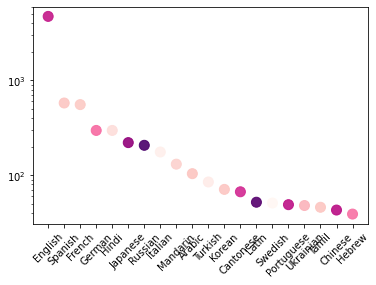

In [ ]:
fig = plt.figure()
ax = plt.gca()
colors = np.random.rand(20)
# sizes = films_per_language_sorted.num_of_films[:20]/np.linalg.norm(films_per_language_sorted.num_of_films[:20])*10000
ax.scatter(films_per_language_sorted.language[:20], films_per_language_sorted.num_of_films[:20], c=colors, s = 100, alpha=0.9, cmap='RdPu')
plt.xticks(rotation=45)
ax.set_yscale('log')
plt.show()

We count the number of films for each language and give a scatter plot to show the top 20 languages with the most films. From this plot, we can see almost 85% of films (4730) are in English, Spanish and French	films are more than five hundred. Other languages such as German, Hindi, Japanese, Russian, Italian, Mandarin and Arabic also have more than 100 films.

## Other Numerical Variables Distribution

### Published Year

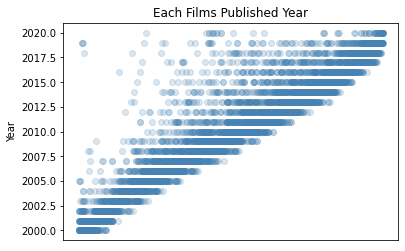

In [ ]:
plt.scatter(imdb.title, imdb.year, c='steelblue', alpha=0.2)
#plt.xticks(imdb.title[::100],  rotation='vertical')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.title('Each Films Published Year')
plt.xlabel('Films')
plt.ylabel('Year')
plt.show()

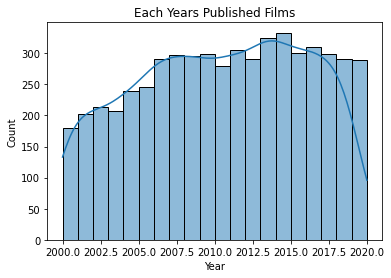

In [ ]:
sns.histplot(data=imdb, x='year', kde=True) 
_=plt.title('Each Years Published Films')
_=plt.xlabel('Year')
_=plt.ylabel('Count')
plt.show()

This plot shows each year's published films. The number of films is slightly increasing as the year increase.

### Films Average Rate

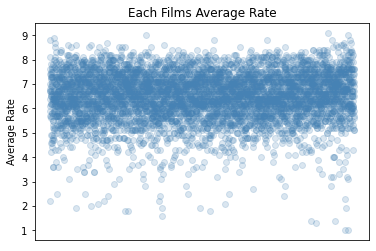

In [ ]:
plt.scatter(imdb.title, imdb.avg_vote, c='steelblue', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

_=plt.title('Each Films Average Rate')
_=plt.xlabel('Films')
_=plt.ylabel('Average Rate')

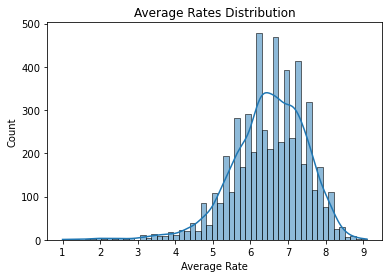

In [ ]:
sns.histplot(data=imdb, x='avg_vote', kde=True) 
_=plt.title('Average Rates Distribution')
_=plt.xlabel('Average Rate')
_=plt.ylabel('Count')
plt.show()

This plot shows the distribution of average rates. Most of the films are voted between 5 to 8, and the most common vote is 6.2.

### Films Duration

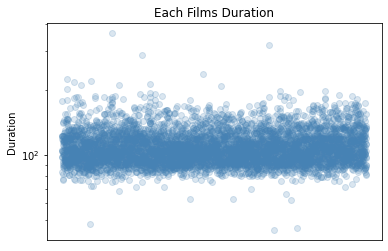

In [ ]:
plt.scatter(imdb.title, imdb.duration, c='steelblue', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.set_yscale('log')
plt.title('Each Films Duration')
plt.xlabel('Films')
plt.ylabel('Duration')
plt.show()

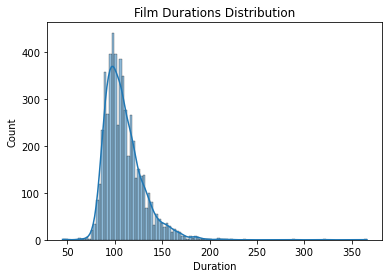

In [ ]:
sns.histplot(data=imdb, x='duration', kde=True) 
plt.title('Film Durations Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

This plot shows the distribution of films' duration. Most movies are between 75 to 150 mins, and the number of films with a duration of around 100 is the most.

### Number of people vote

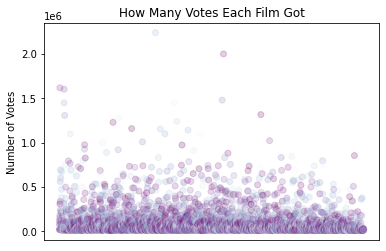

In [ ]:
colors = np.random.rand(len(imdb))
plt.scatter(imdb.title, imdb.votes, c=colors, cmap='BuPu', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
# frame.set_yscale('log')
plt.title('How Many Votes Each Film Got')
plt.xlabel('Films')
plt.ylabel('Number of Votes')
plt.show()

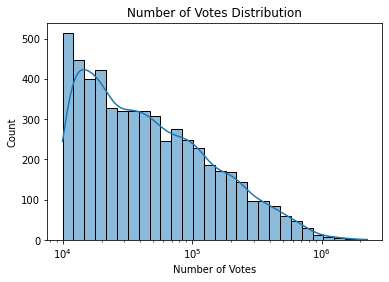

In [ ]:
sns.histplot(data=imdb, x='votes', log_scale = True, kde=True)
plt.title('Number of Votes Distribution')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.show()

This plot shows the number of votes' distribution. Films' number of votes is between 10 thousand to 1 million.

### Number of Reviews from Users

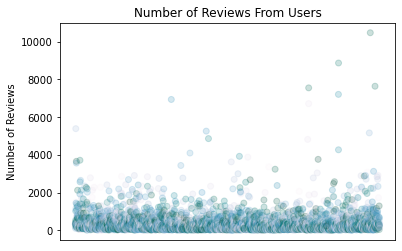

In [ ]:
colors = np.random.rand(len(imdb))
plt.scatter(imdb.title, imdb.reviews_from_users, c=colors, cmap='PuBuGn', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.title('Number of Reviews From Users')
plt.xlabel('Films')
plt.ylabel('Number of Reviews')
plt.show()

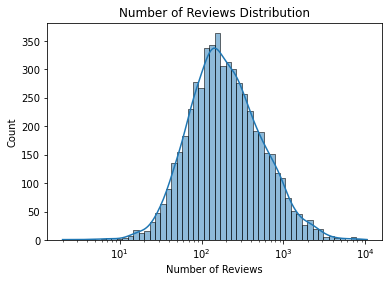

In [ ]:
sns.histplot(data=imdb, x='reviews_from_users', log_scale = True, kde=True) 
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

This plot shows the number of reviews distribution. Most films' number of reviews is between 10 to 1000.

### USA Gross Income

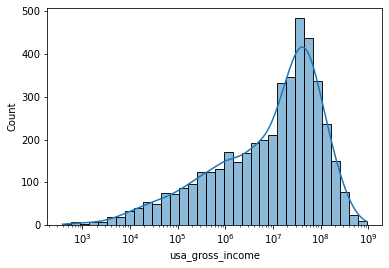

In [ ]:
sns.histplot(data=imdb, x='usa_gross_income', log_scale = True, kde=True) 
plt.show()

This plot shows the USA's gross income. Most films' number of reviews is between 10 million to 100 million.

## Rank Films by Average Rates

### 10 Best Films

In [ ]:
# 10 best films
imdb_rated = imdb.sort_values(by=['avg_vote'], ascending=False)
imdb_rated.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
5007,tt5354160,Aynabaji,Aynabaji,2016,2016-09-30 00:00:00,"Crime, Mystery, Thriller",147,Bangladesh,Bengali,NaN,...,Chanchal Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila",Ayna is an actor and the prison is his stage. ...,Ayna is an actor and the prison,9.1,19876,BDT 35000000,NaN,NaN,114.0
5373,tt7738784,Peranbu,Peranbu,2018,2019-02-01 00:00:00,Drama,147,India,Tamil,NaN,...,Mammootty,"Mammootty, Sadhana, Anjali","A single father tries to raise his daughter, w...",A single father tries to raise,9.0,11752,INR 70000000,NaN,3417,369.0
1725,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23 00:00:00,"Action, Crime, Drama",152,"USA, UK",English,Mandarin,...,Christian Bale,"Christian Bale, Heath Ledger",When the menace known as the Joker wreaks havo...,When the menace known as the Joker,9.0,2241615,185000000,535234033.0,1005455211,6938.0
84,tt0167260,Il Signore degli Anelli - Il ritorno del re,The Lord of the Rings: The Return of the King,2003,2004-01-22 00:00:00,"Action, Adventure, Drama",201,"New Zealand, USA",English,Quenya,...,Noel Appleby,"Noel Appleby, Ali Astin",Gandalf and Aragorn lead the World of Men agai...,Gandalf and Aragorn lead the World,8.9,1604280,94000000,377845905.0,1142271098,3718.0
3907,tt2170667,Wheels,Wheels,2014,2017-02-01 00:00:00,Drama,115,USA,English,NaN,...,Donavon Warren,"Donavon Warren, Patrick Hume",Two suicidal paraplegic junkies hustle their w...,Two suicidal paraplegic junkies,8.8,17814,NaN,NaN,NaN,41.0
2952,tt1375666,Inception,Inception,2010,2010-09-24 00:00:00,"Action, Adventure, Sci-Fi",148,"USA, UK",English,Japanese,...,Leonardo DiCaprio,"Leonardo DiCaprio, Joseph Gordon-Levitt",A thief who steals corporate secrets through t...,A thief who steals corporate secrets,8.8,2002816,160000000,292576195.0,869784991,3927.0
5403,tt8110330,Dil Bechara,Dil Bechara,2020,2020-07-24 00:00:00,"Comedy, Drama, Romance",101,India,Hindi,NaN,...,Sushant Singh Rajput,Sushant Singh Rajput,The emotional journey of two hopelessly in lov...,The emotional journey of two hopelessly,8.8,101686,NaN,NaN,42248,7639.0
9,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,The Lord of the Rings: The Fellowship of the Ring,2001,2002-01-18 00:00:00,"Action, Adventure, Drama",178,"New Zealand, USA",English,Sindarin,...,Alan Howard,"Alan Howard, Noel Appleby",A meek Hobbit from the Shire and eight compani...,A meek Hobbit from the Shire and,8.8,1619920,93000000,315544750.0,887934303,5392.0
5094,tt5813916,Montagna II,Dag II,2016,2016-11-04 00:00:00,"Action, Drama, War",135,Turkey,Turkish,NaN,...,Caglar Ertugrul,"Caglar Ertugrul, Ufuk Bayraktar",In a desolate war zone where screams of the in...,In a desolate war zone where screams,8.8,103949,TRL 2000000,NaN,11378898,145.0
5435,tt8503618,Hamilton,Hamilton,2020,2020-07-03 00:00:00,"Biography, Drama, History",160,USA,English,NaN,...,Daveed Diggs,"Daveed Diggs, Renée Elise Goldsberry",The real life of one of America's foremost fou...,The real life of one of America's,8.7,37551,NaN,NaN,NaN,488.0


### 10 Worst Films

In [ ]:
# 10 most terrible films
imdb_rated = imdb.sort_values(by=['avg_vote'])
imdb_rated.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
5382,tt7886848,Sadak 2,Sadak 2,2020,2020-08-28 00:00:00,"Action, Drama",133,India,Hindi,NaN,...,Priyanka Bose,"Priyanka Bose, Alia Bhatt","The film picks up where Sadak left off, revolv...",The film picks up where Sadak,1.0,53162,NaN,NaN,NaN,623.0
5311,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,2017-08-04 00:00:00,Comedy,100,Turkey,Turkish,NaN,...,Halil Söyletmez,"Halil Söyletmez, Doga Konakoglu",Cumali Ceber goes to a vacation with his child...,Cumali Ceber goes to a vacation,1.0,37592,TRL 10000,NaN,1415773,42.0
4802,tt4458206,Kod Adi K.O.Z.,Kod Adi K.O.Z.,2015,2015-02-13 00:00:00,"Crime, Mystery",114,Turkey,Turkish,NaN,...,Cem Kurtoglu,"Cem Kurtoglu, Hakan Ural",A look at the 17-25 December 2013 corruption s...,A look at the 17-25 December 2013,1.3,27100,NaN,NaN,1186730,73.0
5132,tt5988370,Reis,Reis,2017,2017-03-03 00:00:00,"Biography, Drama",108,Turkey,Turkish,NaN,...,Orhan Aydin,"Orhan Aydin, Özlem Balci",A rich man catches a thief burglarizing his ho...,A rich man catches a thief burglarizing,1.4,72151,8000000,NaN,538551,45.0
4708,tt4009460,Saving Christmas,Saving Christmas,2014,2014-11-14 00:00:00,"Comedy, Family",79,USA,English,NaN,...,Kirk Cameron,"Kirk Cameron, Darren Doane",His annual Christmas party faltering thanks to...,His annual Christmas party faltering,1.4,14814,500000,2783970.0,2783970,167.0
2023,tt0808240,Dünyayi Kurtaran Adam'in Oglu,Dünyayi Kurtaran Adam'in Oglu,2006,2006-12-15 00:00:00,"Action, Comedy, Sci-Fi",110,Turkey,Turkish,NaN,...,Cüneyt Arkin,"Cüneyt Arkin, Miraç Bayramoglu",A family of Turks try to adapt to life in a ne...,A family of Turks try to adapt,1.6,15552,5000000,NaN,2381856,20.0
1360,tt0417056,Pledge This!,Pledge This!,2006,2007-02-08 00:00:00,Comedy,91,"USA, Mexico",English,NaN,...,Paris Hilton,"Paris Hilton, Paula Garcés","At South Beach University, a beautiful sororit...","At South Beach University, a beautiful",1.8,16723,8300000,NaN,1751490,88.0
1398,tt0421051,Daniel der Zauberer,Daniel der Zauberer,2004,2004-08-12 00:00:00,"Comedy, Crime, Fantasy",81,Germany,German,NaN,...,Daniel Küblböck,"Daniel Küblböck, Ulli Lommel","Evil assassins want to kill Daniel Kublbock, t...",Evil assassins want to kill Daniel,1.8,13819,NaN,NaN,NaN,48.0
2876,tt1316037,Birdemic: Shock and Terror,Birdemic: Shock and Terror,2010,2010-02-27 00:00:00,"Horror, Thriller",105,USA,English,NaN,...,Alan Bagh,"Alan Bagh, Whitney Moore",A horde of mutated birds descends upon the qui...,A horde of mutated birds descends,1.8,20840,10000,NaN,NaN,278.0
2007,tt0804492,The Hottie & the Nottie,The Hottie & the Nottie,2008,2008-02-21 00:00:00,"Comedy, Romance",91,USA,English,NaN,...,Paris Hilton,"Paris Hilton, Joel David Moore",A woman agrees to go on a date with a man only...,A woman agrees to go on a date,1.9,35952,NaN,27696.0,1596232,120.0
